In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

from IPython.display import display #To display dataframe with a nice format.

# Setting display precision for pandas
pd.set_option("display.precision", 2)
# Set display option to show all columns
pd.set_option('display.max_columns', None)

blue_green      = (82/255, 162/255, 160/255)
blue_green_dark = (41/255, 81/255, 81/255)

# ==================================================================================================
# Set the fontsize & weight for each GRAPH !!!
# ==================================================================================================
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 10
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams['axes.titlepad'] = 20 

In [2]:
# ==================================================================================================
# READ DATA
# ==================================================================================================
import csv
# Define the file path for the Excel data
url_data = r'C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET4_Anticipez_les_besoins_en_consommation_de_batiments\DATA\df_data.xlsx'
df_data = pd.read_excel(url_data)

url_data = r'C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET4_Anticipez_les_besoins_en_consommation_de_batiments\DATA\df_targets.xlsx'
df_targets = pd.read_excel(url_data)

# 0. SELECT ONE TARGET

In [3]:
# ==================================================================================================
# Select one target between the two : 'TotalGHGEmissions' or 'SiteEnergyUseWN(kBtu)'
# ==================================================================================================
df_target1 = df_targets['TotalGHGEmissions']
df_target2 = df_targets['SiteEnergyUseWN(kBtu)']

df_current_target = df_target2

In [4]:
df_data

BuildingType          PrimaryPropertyType  \
0        NonResidential                        Hotel   
1        NonResidential                        Hotel   
2        NonResidential                        Hotel   
3        NonResidential                        Hotel   
4        NonResidential                        Hotel   
...                 ...                          ...   
1498     NonResidential  Small- and Mid-Sized Office   
1499     NonResidential                        Other   
1500     NonResidential                  K-12 School   
1501     NonResidential           Mixed Use Property   
1502  Nonresidential WA                   University   

                     PropertyName      Neighborhood  \
0            Mayflower park hotel          DOWNTOWN   
1                 Paramount Hotel          DOWNTOWN   
2         5673-The Westin Seattle          DOWNTOWN   
3                       HOTEL MAX          DOWNTOWN   
4     WARWICK SEATTLE HOTEL (ID8)          DOWNTOWN   
...                           ...               ...   
1498      Airport - Main Terminal  GREATER DUWAMISH   
1499     Tennis Center Sand Point         NORTHEAST   
1500       Hamlin Robinson School  GREATER DUWAMISH   
1501                         AIBS        LAKE UNION   
1502                 Burke Museum         NORTHEAST   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                                                 Hotel   
3                                                 Hotel   
4                         Hotel, Parking, Swimming Pool   
...                                                 ...   
1498                                             Office   
1499                                 Other - Recreation   
1500                               K-12 School, Parking   
1501  Data Center, Laboratory, Museum, Office, Other...   
1502                                 College/University   

     LargestPropertyUseType SecondLargestPropertyUseType  \
0                     Hotel        NO OTHER PROPERTY USE   
1                     Hotel                      Parking   
2                     Hotel        NO OTHER PROPERTY USE   
3                     Hotel        NO OTHER PROPERTY USE   
4                     Hotel                      Parking   
...                     ...                          ...   
1498                 Office        NO OTHER PROPERTY USE   
1499     Other - Recreation        NO OTHER PROPERTY USE   
1500            K-12 School                      Parking   
1501             Laboratory                       Office   
1502     College/University        NO OTHER PROPERTY USE   

     ThirdLargestPropertyUseType  ENERGYSTARScore  SteamUse(kBtu)_Usage  \
0          NO OTHER PROPERTY USE            60.00                     1   
1                     Restaurant            61.00                     0   
2          NO OTHER PROPERTY USE            43.00                     1   
3          NO OTHER PROPERTY USE            56.00                     1   
4                  Swimming Pool            75.00                     0   
...                          ...              ...                   ...   
1498       NO OTHER PROPERTY USE             9.00                     0   
1499       NO OTHER PROPERTY USE            68.00                     0   
1500       NO OTHER PROPERTY USE            77.00                     0   
1501                     Parking            46.86                     0   
1502       NO OTHER PROPERTY USE            59.62                     0   

      Electricity(kBtu)_Usage  NaturalGas(kBtu)_Usage  Proportion_Electricity  \
0                           1                       1                    0.55   
1                           1                       1                    0.39   
2                           1                       1                    0.68   
3                     

# 0.BIS. ENCODE CATEGORICAL FEATURES AND ADD TO NUMERICAL FEATURES

In [5]:
# ==================================================================================================
# One Hot Encoding for Categorical features.
# ==================================================================================================
# Select numerical features
df_final_features = df_data.select_dtypes(include=['float64', 'int64'])

# Select categorical features
categorical_features = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']

# Perform one-hot encoding for categorical features
df_encoded_categorical = pd.get_dummies(df_data[categorical_features])

In [6]:
df_encoded_categorical

BuildingType_Campus  BuildingType_NonResidential  \
0                   False                         True   
1                   False                         True   
2                   False                         True   
3                   False                         True   
4                   False                         True   
...                   ...                          ...   
1498                False                         True   
1499                False                         True   
1500                False                         True   
1501                False                         True   
1502                False                        False   

      BuildingType_Nonresidential COS  BuildingType_Nonresidential WA  \
0                               False                           False   
1                               False                           False   
2                               False                           False   
3                               False                           False   
4                               False                           False   
...                               ...                             ...   
1498                            False                           False   
1499                            False                           False   
1500                            False                           False   
1501                            False                           False   
1502                            False                            True   

      BuildingType_SPS-District K-12  PrimaryPropertyType_Distribution Center  \
0                              False                                    False   
1                              False                                    False   
2                              False                                    False   
3                              False                                    False   
4                              False                                    False   
...                              ...                                      ...   
1498                           False                                    False   
1499                           False                                    False   
1500                           False                                    False   
1501                           False                                    False   
1502                           False                                    False   

      PrimaryPropertyType_Hospital  PrimaryPropertyType_Hotel  \
0                            False                       True   
1                            False                       True   
2                            False                       True   
3                            False                       True   
4                            False                       True   
...                            ...                        ...   
1498                         False                      False   
1499                         False                      False   
1500                         False                      False   
1501                         False                      False   
1502                         False                      False   

      PrimaryPropertyType_K-12 School  PrimaryPropertyType_Laboratory  \
0                               False                           False   
1                               False                           False   
2                               False                           False   
3                               False                           False   
4                               False                           False   
...                               ...                             ...   
1498                            False                           False   
1499                            False                           False   
1500                 

# 0.BIS.2. PCA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
len(df_data.select_dtypes(include=['float64', 'int64']).columns)

24

In [9]:
# # ==================================================================================================
# # How much PCA should i keep to retain >90% of the information ?
# # Use it when df_final_features is created (so when it contains both numerical & encoded categorical features)
# # ==================================================================================================
# # Select numerical+encoded categorical features
# list_features = df_final_features.columns.tolist()

# # Step 1: Standardize the data
# X = df_final_features[list_features]
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Initialize a list to store information_retained values
# information_retained_list = []

# # Step 2: Fit PCA
# for i in range(1, len(list_features)):
#     pca = PCA(n_components=i)  # Specify the number of components
#     pca.fit(X_scaled)
#     X_pca = pca.transform(X_scaled)
    
#     information_retained = sum(pca.explained_variance_ratio_)
#     information_retained_list.append(information_retained)

# # Create a DataFrame from the information_retained list
# info_df = pd.DataFrame({
#     'Components': range(1, len(list_features)),
#     'Information Retained': information_retained_list
# })

# # Find the number of components required to retain at least 90% of the information
# required_components = info_df[info_df['Information Retained'] >= 0.9]['Components'].iloc[0]
# print(required_components)

# display(info_df)


# # Plot information retained vs number of components
# plt.figure(figsize=(10, 6))
# plt.plot(info_df['Components'], info_df['Information Retained'], marker='o', linestyle='-', label='Information Retained', color = blue_green)
# plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
# plt.axvline(x=required_components, color='r', linestyle='--')
# plt.scatter(required_components, 0.9, color='r', marker='o', label=f'{required_components} Components (>90% Retained)')

# # Bold title with increased font size
# plt.title('Information Retained vs Number of Components', fontsize=18, fontweight='bold')

# # Axis labels with increased font size and bold
# plt.xlabel('Number of Components', fontsize=14, fontweight='bold')
# plt.ylabel('Information Retained', fontsize=14, fontweight='bold')

# plt.grid(True)

# # Set x-axis ticks to show every 10th component
# nb_tick_label = 10
# plt.xticks(np.arange(0, len(list_features) + 1, nb_tick_label))
# # Define the list of component labels to show every 10th component
# component_labels = [str(i) if i % nb_tick_label == 0 else '' for i in range(1, len(list_features) + 1)]

# plt.xticks(range(1, len(list_features) + 1), component_labels)
# plt.yticks(np.arange(0, 1.1, 0.1))
# plt.legend()
# plt.tight_layout()
# plt.show()



# 0.BIS.3. Point Biserial Correlation

In [10]:
from scipy.stats import pointbiserialr

In [11]:
# ==================================================================================================
# COMPUTE POINT BISERIAL CORRELATION BETWEEN (ONE HOT ENCODED CATEGORICAL FEATURE) and TARGET
# ==================================================================================================
# Initialize a list to store correlation coefficients
correlation_coefficients = []

# Loop through each one-hot encoded feature
for column in df_encoded_categorical.columns:
    # Calculate point biserial correlation coefficient
    corr, _ = pointbiserialr(df_encoded_categorical[column], df_current_target)
    correlation_coefficients.append((column, corr))

# Convert the list of correlation coefficients into a DataFrame
correlation_df = pd.DataFrame(correlation_coefficients, columns=['Feature', 'Correlation'])

# Sort the DataFrame by absolute correlation values
correlation_df = correlation_df.reindex(correlation_df['Correlation'].abs().sort_values(ascending=False).index)

# Display the DataFrame
print(correlation_df)

                                               Feature  Correlation
6                         PrimaryPropertyType_Hospital     4.72e-01
49   LargestPropertyUseType_Hospital (General Medic...     4.72e-01
109            SecondLargestPropertyUseType_Laboratory     2.29e-01
0                                  BuildingType_Campus     2.23e-01
43                  LargestPropertyUseType_Data Center     2.07e-01
..                                                 ...          ...
167  ThirdLargestPropertyUseType_Refrigerated Wareh...     1.12e-03
172             ThirdLargestPropertyUseType_Strip Mall    -8.67e-04
125       SecondLargestPropertyUseType_Performing Arts     7.14e-04
154                 ThirdLargestPropertyUseType_Office    -1.33e-04
139            ThirdLargestPropertyUseType_Bank Branch    -8.81e-05

[177 rows x 2 columns]


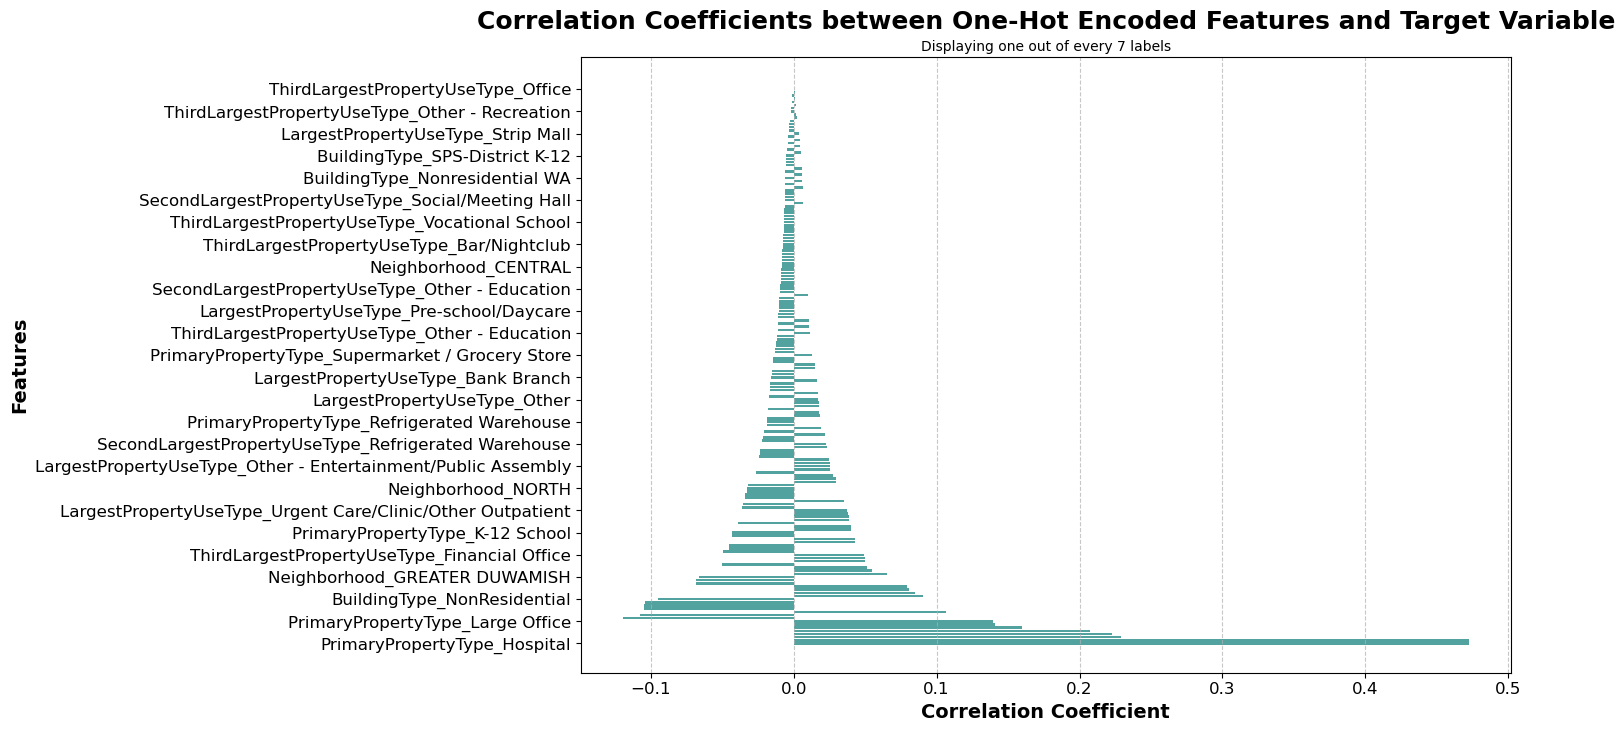

In [12]:
# ==================================================================================================
# PLOT POINT BISERIAL CORRELATION RESULTS
# ==================================================================================================
# Sort the DataFrame by absolute correlation values
correlation_df = correlation_df.reindex(correlation_df['Correlation'].abs().sort_values(ascending=False).index)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(correlation_df['Feature'], correlation_df['Correlation'], color=blue_green)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlation Coefficients between One-Hot Encoded Features and Target Variable')
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Manually set y-ticks to display every Nth label
N = 7
plt.yticks(range(0, len(correlation_df), 7), correlation_df['Feature'][::7])
# Add annotation to indicate that only one out of every N labels is displayed
plt.text(0.5, 1.01, f"Displaying one out of every {N} labels", transform=plt.gca().transAxes, ha="center")
plt.show()

In [13]:
# ==================================================================================================
# WE REMOVE THE NON NEEDED FEATURES (the ones not correlated with my target) BASED ON A TRESHOLD.
# ==================================================================================================
# Set correlation coefficient threshold
threshold = 0.2  # Adjust this threshold as needed

# Filter out features with correlation coefficients below the threshold
non_correlated_features = correlation_df[abs(correlation_df['Correlation']) < threshold]['Feature']

print(len(correlation_df[abs(correlation_df['Correlation']) > threshold]['Feature']))
# Print non-correlated features
print("Non-correlated features: ", non_correlated_features)
# print(non_correlated_features)


# Drop non-correlated features from df_encoded_categorical
df_encoded_categorical = df_encoded_categorical.drop(columns=non_correlated_features)


5
Non-correlated features:  124                 SecondLargestPropertyUseType_Parking
153    ThirdLargestPropertyUseType_Non-Refrigerated W...
10                      PrimaryPropertyType_Large Office
20       PrimaryPropertyType_Small- and Mid-Sized Office
60     LargestPropertyUseType_Non-Refrigerated Warehouse
                             ...                        
167    ThirdLargestPropertyUseType_Refrigerated Wareh...
172               ThirdLargestPropertyUseType_Strip Mall
125         SecondLargestPropertyUseType_Performing Arts
154                   ThirdLargestPropertyUseType_Office
139              ThirdLargestPropertyUseType_Bank Branch
Name: Feature, Length: 172, dtype: object


In [14]:
# ==================================================================================================
# Get the numerical and encoded categorical features in ONE dataframe: df_final_features.
# ==================================================================================================
# Concatenate numerical and encoded categorical features
df_final_features = pd.concat([df_final_features, df_encoded_categorical], axis=1)
df_final_features

ENERGYSTARScore  SteamUse(kBtu)_Usage  Electricity(kBtu)_Usage  \
0               60.00                     1                        1   
1               61.00                     0                        1   
2               43.00                     1                        1   
3               56.00                     1                        1   
4               75.00                     0                        1   
...               ...                   ...                      ...   
1498             9.00                     0                        1   
1499            68.00                     0                        1   
1500            77.00                     0                        1   
1501            46.86                     0                        1   
1502            59.62                     0                        1   

      NaturalGas(kBtu)_Usage  Proportion_Electricity  Proportion_NaturalGas  \
0                          1                    0.55                   0.18   
1                          1                    0.39                   0.61   
2                          1                    0.68                   0.02   
3                          1                    0.41                   0.27   
4                          1                    0.38                   0.62   
...                      ...                     ...                    ...   
1498                       1                    0.49                   0.51   
1499                       1                    0.65                   0.35   
1500                       0                    1.00                   0.00   
1501                       1                    0.60                   0.40   
1502                       0                    1.00                   0.00   

      Proportion_SteamUse  TotalBuildingSize  Electricity_Intensity  \
0                    0.28              88434                  44.62   
1                    0.00             103566                  31.31   
2                    0.30             956110                  51.80   
3                    0.33              61320                  45.16   
4                    0.00             175580                  30.58   
...                   ...                ...                    ...   
1498                 0.00              24990                  86.72   
1499                 0.00              72000                  26.41   
1500                 0.00              45000                  29.47   
1501                 0.00             345290                  68.45   
1502                 0.00              68072                  46.73   

      NaturalGas_Intensity  SteamUse_Intensity  Electricity_Used_Office  \
0                    14.43               22.66                        0   
1                    49.68                0.00                        0   
2                     1.56               22.56                        0   
3                    29.54               36.11                        0   
4                    50.14                0.00                        0   
...                    ...                 ...                      ...   
1498                 90.18                0.00                        0   
1499                 14.22                0.00                        0   
1500                  0.00                0.00                        0   
1501                 45.55                0.00                        0   
1502                  0.00                0.00                        0   

      Electricity_Used_Retail  Electricity_Used_Hotel  BuildingAge  \
0                           0                       1           97   
1                           0                       1           28   
2                           0                       1           55   
3                           0                       1           98   
4                           0                       1           44   
...               

# I. LINEAR REGRESSION

## I.0. Function Evaluation Metrics

In [15]:
# Define a custom scoring function for R²
def r2_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    r2 = r2_score(y, y_pred)
    # Clip the R² score to the valid range of -1 to 1
    r2_clipped = np.clip(r2, -1, 1)
    return r2_clipped

In [16]:
# Define a function to calculate and store the metrics
def calculate_metrics(model, model_name, y_test, y_pred, X_train, y_train, existing_df=None):
    """
    Calculate evaluation metrics for a regression model using cross-validation (5-fold).

    Parameters:
    model : sklearn estimator
        The trained regression model.
    model_name : str
        Name of the model.
    y_test : array-like
        True target values for the test set.
    y_pred : array-like
        Predicted target values for the test set.
    X_train : array-like
        Features of the training set.
    y_train : array-like
        Target values of the training set.
    existing_df : pandas DataFrame, optional
        Existing DataFrame to which the calculated metrics will be appended. 
        Default is None, which creates a new DataFrame.

    Returns:
    updated_df : pandas DataFrame
        DataFrame containing evaluation metrics for the model.
    
    Evaluation Metrics:
    - RMSE: Root Mean Squared Error
    - MAE: Mean Absolute Error
    - R²: Coefficient of Determination (R-squared)
    - CV RMSE Mean: Mean of RMSE scores obtained from 5-fold cross-validation
    - CV MAE Mean: Mean of MAE scores obtained from 5-fold cross-validation
    - CV R² Mean: Mean of R² scores obtained from 5-fold cross-validation
    """
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate baseline error
    baseline_error = np.mean((y_pred - y_test) ** 2)
    
    # Calculate MSE, RMSE, MAE, and R²
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r2 = np.clip(r2, -1, 1)
    
    # Perform cross-validation and calculate metrics
    cv_mse = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(cv_mse)  

    cv_mae = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring=r2_scorer)
    
    # Calculate mean of cross-validated metrics
    cv_rmse_mean = np.mean(cv_rmse)
    cv_mae_mean = np.mean(cv_mae)
    cv_r2_mean = np.mean(cv_r2)
    
    # Store the metrics in a dictionary
    metrics = {
        'Model': model_name,
        # 'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'CV RMSE Mean': cv_rmse_mean,
        'CV MAE Mean': cv_mae_mean,
        'CV R² Mean': cv_r2_mean
    }
    
    # If an existing DataFrame is provided, append the new metrics to it
    if existing_df is not None:
        updated_df = pd.concat([existing_df, pd.DataFrame(metrics, index=[0])], ignore_index=True)
    else:
        updated_df = pd.DataFrame(metrics, index=[0])
    
    return updated_df


## I.1. LINEAR REGRESSION MODEl 

In [17]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from missforest.missforest import MissForest
from sklearn.ensemble import RandomForestRegressor

import numpy as np
from sklearn.preprocessing import FunctionTransformer

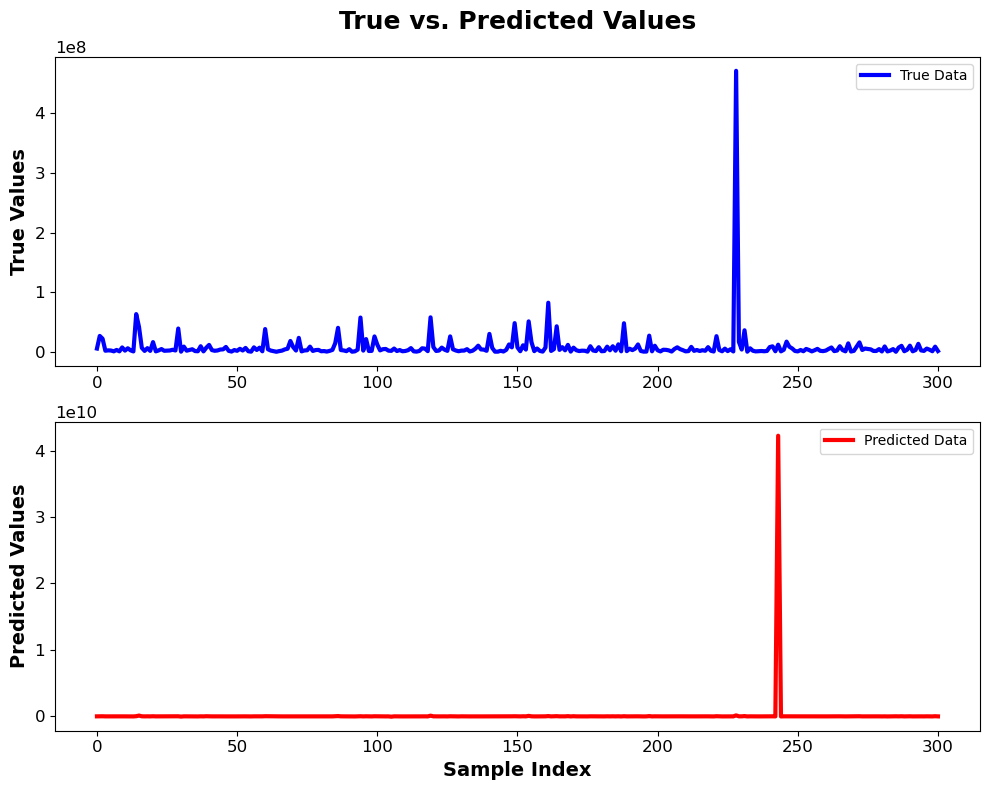

In [18]:
# ==================================================================================================
# LINEAR REGRESSION MODEL (WITH IPELINE) + CROSS VALIDATION
# ==================================================================================================
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score, mean_squared_error


import numpy as np

# Define a custom scoring function for R²
def r2_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    r2 = r2_score(y, y_pred)
    # Clip the R² score to the valid range of -1 to 1
    r2_clipped = np.clip(r2, -1, 1)
    return r2_clipped
    
# Define columns for KNN imputation
knn_columns = ['NumberofBuildings', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']

# Define preprocessing steps for the columns
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_imputer', KNNImputer(), knn_columns),         # Apply KNN imputation to specific columns
    ],
    remainder='passthrough'  # Pass through columns not specified above
)

# Define a function for the logarithmic transformation
log_transform_func = FunctionTransformer(np.log1p, validate=True)

# Combine preprocessor, log transform, and scaler with the model
pipeline_linear_regression = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    # ('log_transform', log_transform_func),
    # ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Select only numerical features
df_numerical_features = df_final_features

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_numerical_features, df_current_target, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline_linear_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = pipeline_linear_regression.predict(X_test)


# ==================================================================================================
# EVALUATION METRICS (Baseline Error, MSE, MAE, R²)
# ==================================================================================================
evaluation_metrics_df = calculate_metrics(pipeline_linear_regression, 'Linear Regression', y_test, y_pred_linear, X_train, y_train)


# ==================================================================================================
# PLOT True (TEST) vs. Predicted Values 
# ==================================================================================================
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot true data in the first subplot
ax1.plot(range(len(y_test)), y_test, color='blue', label='True Data')
ax1.set_ylabel('True Values')
ax1.set_title('True vs. Predicted Values')
ax1.legend()

# Plot predicted data in the second subplot
ax2.plot(range(len(y_pred_linear)), y_pred_linear, color='red', label='Predicted Data')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Predicted Values')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## I.2.  RIDGE REGRESSION

In [19]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

### I.2.1. Selection of the alpha hyperparameter

In [20]:
# # ==================================================================================================
# # ALPHA - HYPERPARAMETER TUNING
# # ==================================================================================================
# # Define the range of alpha values
# n_alphas = 200
# alphas = np.logspace(-5, 5, n_alphas)
# print(max(alphas))
# # Initialize Ridge regression model
# ridge = Ridge()

# # Lists to store coefficients and errors
# coefs = []
# errors = []

# # Iterate over all alpha values
# for a in alphas:
#     # Set alpha parameter for the Ridge model
#     ridge.set_params(alpha=a)
    
#     # Fit the Ridge model on the training data
#     ridge.fit(X_train, y_train)
    
#     # Append coefficients to the list
#     coefs.append(ridge.coef_)
    
#     # Calculate error on the test set
#     test_error = np.mean((ridge.predict(X_test) - y_test) ** 2)
    
#     # Append error to the list
#     errors.append([linear_baseline_error, test_error])

# # Find the index of the minimum test error
# min_error_index = np.argmin(errors, axis=0)[1]

# # Get the corresponding alpha value
# min_alpha_RIDGE = alphas[min_error_index]

# print('Alpha = ', min_alpha_RIDGE)
# # ==================================================================================================
# # PLOT - RIDGE COEFS as a FUNCTION of the REGULARIZATION
# # ==================================================================================================
# fig, ax = plt.subplots(figsize=(10, 6))
# ax = plt.gca()

# ax.plot(alphas, coefs)
# ax.set_xscale('log')
# plt.xlabel('alpha')
# plt.ylabel('weights')
# plt.title('Ridge coefficients as a function of the regularization')
# plt.axis('tight')
# plt.show()


# # ==================================================================================================
# # PLOT - ERROR VS REGULARIZATION STRENGTH (A
# # ==================================================================================================
# # Plotting the errors
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(alphas, errors)
# ax.set_xscale('log')

# # Add vertical red dotted line for minimum error
# ax.axvline(x=min_alpha_RIDGE, color='red', linestyle='--', label=f'Min Error at alpha={min_alpha_RIDGE:.2f}')

# # Labeling the axes and title
# plt.xlabel('alpha (Regularization Strength)')
# plt.ylabel('Error')
# plt.title(f'Error vs. Regularization Strength (alpha)\nMinimum Error at alpha={min_alpha_RIDGE:.2f}')
# plt.legend(['Baseline Error', 'Test Error'], loc='best')
# plt.grid(True)

# # Show the plot
# plt.show()






### I.2.2. RIDGE REGRESSION MODEL

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.7376e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.75565e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.51119e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.44405e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_mode

Best alpha: 2.121451784910632


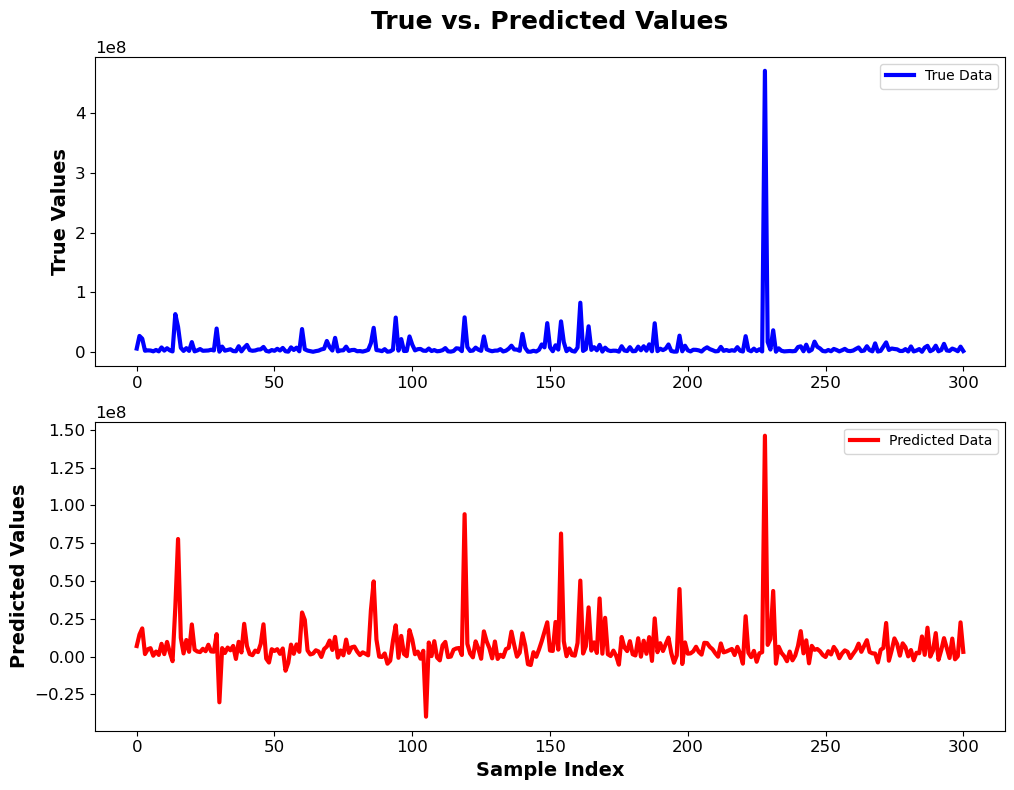

In [21]:
# ==================================================================================================
# RIDGE REGRESSION MODEL (WITH PIPELINE) + CROSS VALIDATION
# ==================================================================================================

from sklearn.model_selection import GridSearchCV

# Define columns for KNN imputation
knn_columns = ['NumberofBuildings', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']

# Define preprocessing steps for the columns
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_imputer', KNNImputer(), knn_columns),         # Apply KNN imputation to specific columns
    ],
    remainder='passthrough'  # Pass through columns not specified above
)

# Define a function for the logarithmic transformation
log_transform_func = FunctionTransformer(np.log1p, validate=True)

# Combine preprocessor, log transform, and scaler with the model
pipeline_ridge_regression = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    # ('log_transform', log_transform_func),
    # ('scaler', StandardScaler()),
    ('ridge_regressor', Ridge())  # Ridge regression model
])

# Define the range of alpha values
param_grid = {
    'ridge_regressor__alpha': np.logspace(-5, 5, 200)  # 200 alpha values from 1e-5 to 1e5
}

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline_ridge_regression, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['ridge_regressor__alpha']
min_alpha_RIDGE = best_alpha
print("Best alpha:", best_alpha)

# Access the best Ridge regressor model from the GridSearchCV object
best_ridge_regressor = grid_search.best_estimator_.named_steps['ridge_regressor']

# Make predictions on the test data using the best Ridge regressor model
y_pred_ridge = best_ridge_regressor.predict(X_test)

# ==================================================================================================
# EVALUATION METRICS (Baseline Error, MSE, MAE, R²)
# ==================================================================================================

# Add evaluations metrics to dataframe.
evaluation_metrics_df = calculate_metrics(best_ridge_regressor, 'Ridge Regression', y_test, y_pred_ridge, X_train, y_train, existing_df=evaluation_metrics_df)



# ==================================================================================================
# PLOT True (TEST) vs. Predicted Values 
# ==================================================================================================
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot true data in the first subplot
ax1.plot(range(len(y_test)), y_test, color='blue', label='True Data')
ax1.set_ylabel('True Values')
ax1.set_title('True vs. Predicted Values')
ax1.legend()

# Plot predicted data in the second subplot
ax2.plot(range(len(y_pred_ridge)), y_pred_ridge, color='red', label='Predicted Data')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Predicted Values')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## I.3. LASSO REGRESSION

In [22]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV


### I.3.1. Selection of the alpha hyperparameter with LassoCV

In [23]:
# # ==================================================================================================
# # ALPHA - HYPERPARAMETER TUNING
# # ==================================================================================================
# # Define the range of alpha values
# n_alphas = 200
# alphas = np.logspace(-5, 5, n_alphas)

# # Initialize Lasso regression model
# lasso = Lasso()

# # Lists to store coefficients and errors
# coefs = []
# errors = []

# # Iterate over all alpha values
# for a in alphas:
#     # Set alpha parameter for the Lasso model
#     lasso.set_params(alpha=a)
    
#     # Fit the Lasso model on the training data
#     lasso.fit(X_train, y_train)
    
#     # Append coefficients to the list
#     coefs.append(lasso.coef_)
    
#     # Calculate error on the test set
#     test_error = np.mean((lasso.predict(X_test) - y_test) ** 2)
    
#     # Append error to the list
#     errors.append([linear_baseline_error, test_error])

# # Find the index of the minimum test error
# min_error_index = np.argmin(errors, axis=0)[1]

# # Get the corresponding alpha value
# min_alpha_LASSO = alphas[min_error_index]


# # ==================================================================================================
# # PLOT - LASSO COEFS as a FUNCTION of the REGULARIZATION
# # ==================================================================================================

# # Plotting the Lasso coefficients
# fig, ax = plt.subplots(figsize=(10, 6))
# for i in range(len(coefs[0])):
#     ax.plot(alphas, [coef[i] for coef in coefs], label=f'Coefficient {i + 1}')

# # Set the x-axis to logarithmic scale
# ax.set_xscale('log')

# # Add labels and title
# plt.xlabel('alpha (Regularization Strength)')
# plt.ylabel('Coefficient Value')
# plt.title('Lasso Coefficients as a Function of Regularization')
# plt.legend()
# plt.grid(True)


# # ==================================================================================================
# # PLOT - ERROR VS REGULARIZATION STRENGTH (Alpha)
# # ==================================================================================================
# # Show the plot
# plt.show()

# # Plotting the errors
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(alphas, errors)
# ax.set_xscale('log')

# # Add vertical red dotted line for minimum error
# ax.axvline(x=min_alpha_LASSO, color='red', linestyle='--', label=f'Min Error at alpha={min_alpha_LASSO:.6f}')

# # Labeling the axes and title
# plt.xlabel('alpha (Regularization Strength)')
# plt.ylabel('Error')
# plt.title(f'Error vs. Regularization Strength (alpha)\nMinimum Error at alpha={min_alpha_LASSO:.6f}')
# plt.legend(['Baseline Error', 'Test Error'], loc='best')
# plt.grid(True)

# # Show the plot
# plt.show()






# # ==================================================================================================
# # PLOT - ZOOMED ERROR VS REGULARIZATION STRENGTH (Alpha)
# # ==================================================================================================
# # Find the index where test error is below baseline error
# error_below_baseline_index = np.where(np.array(errors)[:, 1] < np.array(errors)[:, 0])[0]

# # Find the minimum and maximum alpha values where test error is below baseline error
# min_alpha_below_baseline = alphas[error_below_baseline_index[0]]
# max_alpha_below_baseline = alphas[error_below_baseline_index[-1]]

# # Plotting the errors
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(alphas, errors)
# ax.set_xscale('log')
# display(min(errors))
# # Add vertical red dotted line for minimum error
# ax.axvline(x=min_alpha_LASSO, color='red', linestyle='--', label=f'Min Error at alpha={min_alpha_LASSO:.6f}')

# # Zoom in on the region where test error is below baseline error
# print(min(min(errors)))
# ax.set_ylim(0.99*min(min(errors)), 1.03*min(min(errors)))

# # Labeling the axes and title
# plt.xlabel('alpha (Regularization Strength)')
# plt.ylabel('Error')
# plt.title(f'ZOOMED - Error vs. Regularization Strength (alpha)\nMinimum Error at alpha={min_alpha_LASSO:.6f}')
# plt.legend(['Baseline Error', 'Test Error'], loc='best')
# plt.grid(True)

# # Show the plot
# plt.show()


In [24]:
# min_alpha_LASSO

### I.3.2. LASSO REGRESSION MODEL

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.429e+16, tolerance: 5.055e+13
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.492e+16, tolerance: 4.245e+13
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.783e+16,

Best alpha for Lasso: 100000.0


D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.245e+16, tolerance: 3.005e+13
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.911e+16, tolerance: 4.525e+13
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.961e+16,

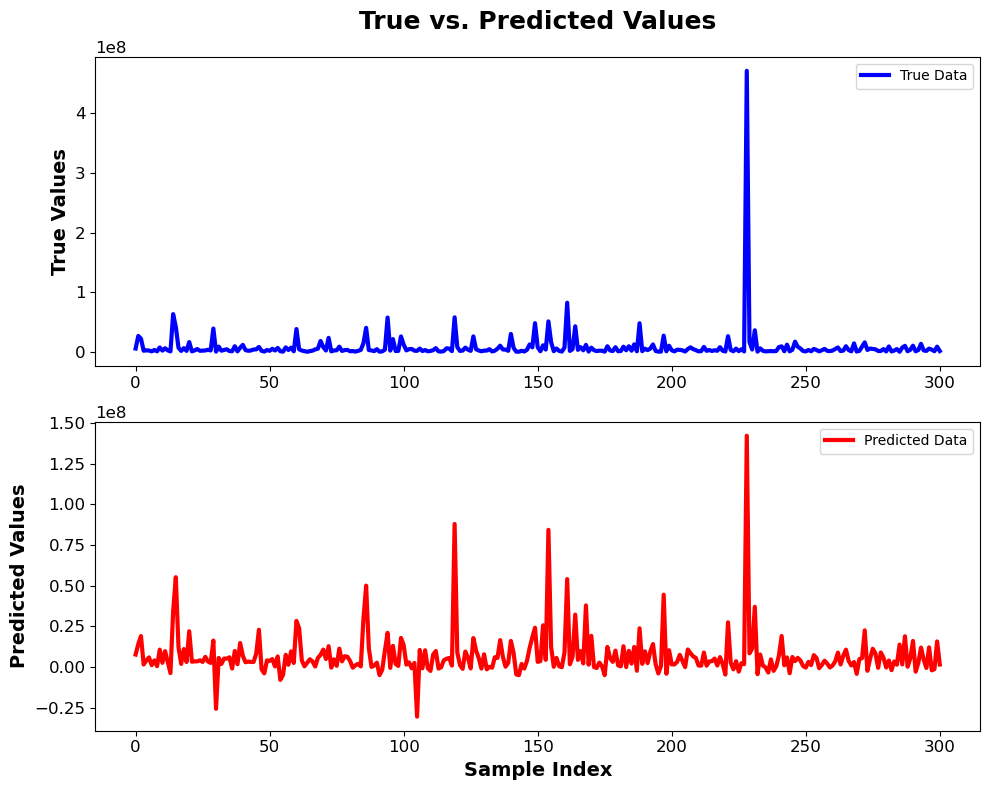

In [25]:
# ==================================================================================================
# LASSO REGRESSION MODEL (WITH PIPELINE) + CROSS VALIDATION
# ==================================================================================================
# Define preprocessing steps for the columns
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_imputer', KNNImputer(), knn_columns),         # Apply KNN imputation to specific columns
    ],
    remainder='passthrough'  # Pass through columns not specified above
)

# Combine preprocessor with the model
pipeline_lasso_regression = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    # ('log_transform', log_transform_func),
    # ('scaler', StandardScaler()),
    ('lasso_regressor', Lasso())  # Lasso regression model
])

# Define the range of alpha values
param_grid = {
    'lasso_regressor__alpha': np.logspace(-5, 5, 200)  # 200 alpha values from 1e-5 to 1e5
}

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search_lasso = GridSearchCV(pipeline_lasso_regression, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object on the training data
grid_search_lasso.fit(X_train, y_train)

# Get the best alpha value
best_alpha_lasso = grid_search_lasso.best_params_['lasso_regressor__alpha']
min_alpha_LASSO = best_alpha_lasso
print("Best alpha for Lasso:", best_alpha_lasso)

# Access the best Lasso regressor model from the GridSearchCV object
best_lasso_regressor = grid_search_lasso.best_estimator_.named_steps['lasso_regressor']

# Make predictions on the test data using the best Lasso regressor model
y_pred_lasso = best_lasso_regressor.predict(X_test)


# ==================================================================================================
# EVALUATION METRICS (Baseline Error, MSE, MAE, R²)
# ==================================================================================================
# Add evaluations metrics to dataframe.
evaluation_metrics_df = calculate_metrics(best_lasso_regressor, 'Lasso Regression', y_test, y_pred_lasso, X_train, y_train, existing_df=evaluation_metrics_df)


# ==================================================================================================
# PLOT True (TEST) vs. Predicted Values 
# ==================================================================================================
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot true data in the first subplot
ax1.plot(range(len(y_test)), y_test, color='blue', label='True Data')
ax1.set_ylabel('True Values')
ax1.set_title('True vs. Predicted Values')
ax1.legend()

# Plot predicted data in the second subplot
ax2.plot(range(len(y_pred_lasso)), y_pred_lasso, color='red', label='Predicted Data')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Predicted Values')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


## I.4. ElasticNet REGRESSION 

### I.4.1. Selection of the alpha and L1 hyperparameters

In [26]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [27]:
# # ==================================================================================================
# # ALPHA and L1 - HYPERPARAMETERS TUNING
# # ==================================================================================================
# # Define the range of alpha values
# n_alphas = 200
# alphas = np.logspace(-5, 5, n_alphas)

# # Define the range of l1_ratio values
# l1_ratios = np.linspace(0.01, 1.0, 100)

# # Initialize ElasticNetCV model
# elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5,  max_iter=100)

# # Fit the model to the data
# elastic_net_cv.fit(X_train, y_train)

# # Get the best alpha and l1_ratio
# best_alpha = elastic_net_cv.alpha_
# best_l1_ratio = elastic_net_cv.l1_ratio_

# print("Best alpha:", best_alpha)
# print("Best l1_ratio:", best_l1_ratio)

# # Initialize ElasticNet model with the best alpha and l1_ratio
# elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)

# # Fit the model to the data
# elastic_net.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = elastic_net.predict(X_test)

# # Calculate mean squared error
# elasticnet_baseline_error = np.mean((y_pred - y_test) ** 2)

# print("elasticnet_baseline_error:", elasticnet_baseline_error)




In [28]:
# # ==================================================================================================
# # PLOT - ERROR VS REGULARIZATION STRENGTH (Alpha and L1)
# # ==================================================================================================

# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import cm

# # Get the grid of alphas and l1_ratios used for tuning
# alphas_grid, l1_ratios_grid = np.meshgrid(alphas, l1_ratios)


# # Transpose mse_reshaped to match the shapes of alphas_grid and l1_ratios_grid
# mse_reshaped = elastic_net_cv.mse_path_.mean(axis=2)

# # Filter mse_reshaped to show only values below 8.354612014539677e-05
# mse_filtered = np.where(mse_reshaped < 1.354612014539677e-05, mse_reshaped, np.nan)

# # Create a 2D contour plot
# fig, ax = plt.subplots(figsize=(12, 8))
# contour = ax.contourf(np.log(alphas_grid), l1_ratios_grid, mse_filtered, cmap='viridis')

# # Add a color bar
# cbar = plt.colorbar(contour)
# cbar.set_label('Mean Squared Error')

# # Calculate the maximum value of the mean squared error
# ax.scatter(np.log(best_alpha), best_l1_ratio, color='red', label=f'Best alpha={best_alpha:.2f}, Best l1_ratio={best_l1_ratio:.2f}')

# # Labeling the axes and title
# ax.set_xlabel('log(alpha)')
# ax.set_ylabel('l1_ratio')
# ax.set_title('ZOOMED - Error vs. Regularization Strength (alpha and l1_ratio)')

# # Show legend
# ax.legend()

# plt.show()


In [29]:
# # ==================================================================================================
# # PLOT - ERROR VS REGULARIZATION STRENGTH (Alpha and L1)
# # ==================================================================================================

# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import cm

# # Get the grid of alphas and l1_ratios used for tuning
# alphas_grid, l1_ratios_grid = np.meshgrid(alphas, l1_ratios)

# # Plotting the errors
# fig = plt.figure(figsize=(20, 12))
# ax = fig.add_subplot(111, projection='3d')

# # Transpose mse_reshaped to match the shapes of alphas_grid and l1_ratios_grid
# mse_reshaped = elastic_net_cv.mse_path_.mean(axis=2)

# # Filter mse_reshaped to show only values below 8.354612014539677e-05
# mse_filtered = np.where(mse_reshaped < 1e-05, mse_reshaped, np.nan)
# # mse_filtered = mse_reshaped

# # Set elevation and azimuth angles for top view
# ax.view_init(elev=90, azim=0)

# # Plot the surface
# surf = ax.plot_surface(np.log(alphas_grid), l1_ratios_grid, mse_filtered, cmap='viridis', linewidth=0, antialiased=False)

# # Calculate the maximum value of the mean squared error
# ax.scatter(np.log(best_alpha), best_l1_ratio, 10000,  s=300, color='red', label=f'Best alpha={best_alpha:.2f}, Best l1_ratio={best_l1_ratio:.2f}')

# # Labeling the axes and title
# ax.set_xlabel('log(alpha)')
# ax.set_ylabel('l1_ratio')
# ax.set_zlabel('Mean Squared Error')
# ax.set_title('ZOOMED - Mean Squared Error vs. Regularization Strength (alpha and l1_ratio)')
# ax.legend()

# # Set tick locator and formatter for the z-axis
# ax.zaxis.set_major_locator(plt.LinearLocator(10))

# # Define a custom formatter to display more digits
# class ZFormatter(plt.ScalarFormatter):
#     def __call__(self, x, pos=None):
#         s = f'{x:.6f}'  # Adjust the number of digits as needed
#         return f'{s}'

# # Apply the custom formatter to the z-axis
# ax.zaxis.set_major_formatter(ZFormatter())


# # Add a color bar which maps values to colors
# cbar = fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()



### I.4.2. ELASTICNET REGRESSION MODEL

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.435e+16, tolerance: 5.055e+13
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.498e+16, tolerance: 4.245e+13
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.786e+16,

Best alpha for ElasticNet: 0.0073168071434272
Best l1_ratio for ElasticNet: 0.7000000000000001


D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.178e+16, tolerance: 3.005e+13
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.249e+16, tolerance: 4.525e+13
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.424e+16,

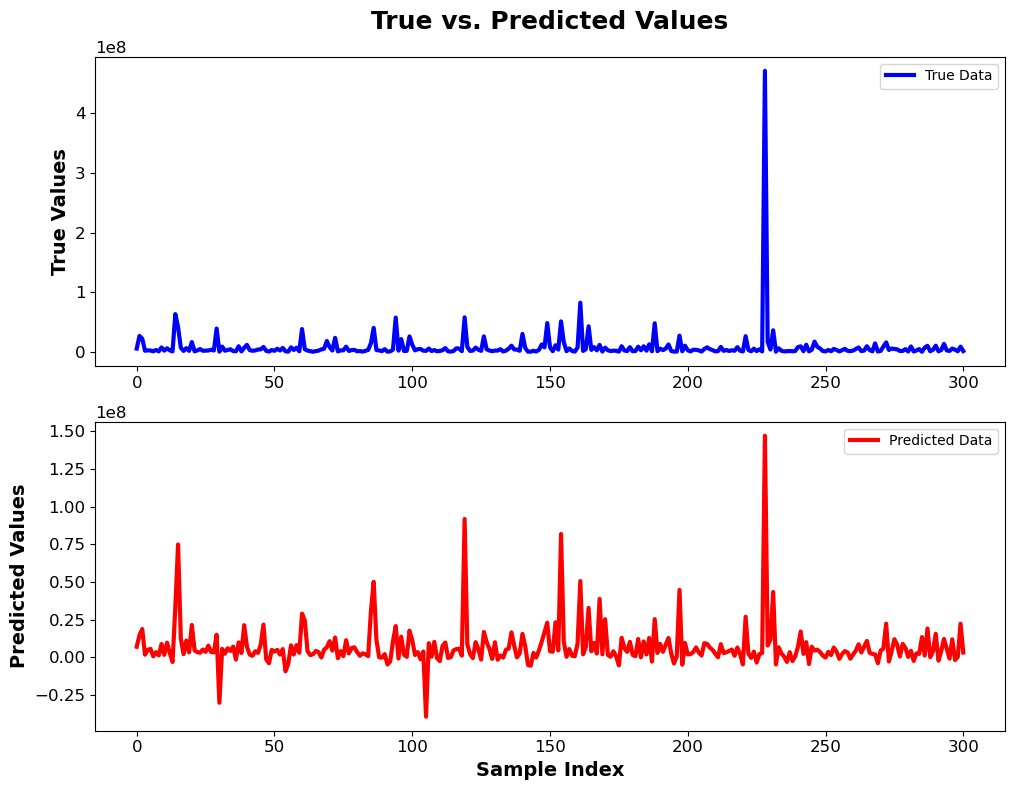

In [30]:
# ==================================================================================================
# ElasticNet REGRESSION MODEL (WITH PIPELINE) + CROSS VALIDATION
# ==================================================================================================
# Define preprocessing steps for the columns
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_imputer', KNNImputer(), knn_columns),         # Apply KNN imputation to specific columns
    ],
    remainder='passthrough'  # Pass through columns not specified above
)

# Combine preprocessor with the model
pipeline_elasticnet_regression = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    # ('log_transform', log_transform_func),
    # ('scaler', StandardScaler()),
    ('elasticnet_regressor', ElasticNet())  # ElasticNet regression model
])

# Define the range of alpha and l1_ratio values
param_grid = {
    'elasticnet_regressor__alpha': np.logspace(-5, 5, 200),  # 200 alpha values from 1e-5 to 1e5
    'elasticnet_regressor__l1_ratio': np.linspace(0.1, 0.9, 9)  # 9 l1_ratio values from 0.1 to 0.9
}

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search_elasticnet = GridSearchCV(pipeline_elasticnet_regression, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object on the training data
grid_search_elasticnet.fit(X_train, y_train)

# Get the best alpha and l1_ratio values
best_alpha_elasticnet = grid_search_elasticnet.best_params_['elasticnet_regressor__alpha']
best_l1_ratio_elasticnet = grid_search_elasticnet.best_params_['elasticnet_regressor__l1_ratio']
print("Best alpha for ElasticNet:", best_alpha_elasticnet)
print("Best l1_ratio for ElasticNet:", best_l1_ratio_elasticnet)
min_alpha_elasticnet = best_alpha_elasticnet
min_l1_ratio_elasticnet = best_l1_ratio_elasticnet
# Access the best ElasticNet regressor model from the GridSearchCV object
best_elasticnet_regressor = grid_search_elasticnet.best_estimator_.named_steps['elasticnet_regressor']

# Make predictions on the test data using the best ElasticNet regressor model
y_pred_elasticnet = best_elasticnet_regressor.predict(X_test)

# ==================================================================================================
# EVALUATION METRICS (Baseline Error, MSE, MAE, R²)
# ==================================================================================================
# Add evaluations metrics to dataframe.
evaluation_metrics_df = calculate_metrics(best_elasticnet_regressor, 'ElasticNet Regression', y_test, y_pred_elasticnet, X_train, y_train, existing_df=evaluation_metrics_df)


# ==================================================================================================
# PLOT True (TEST) vs. Predicted Values 
# ==================================================================================================
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot true data in the first subplot
ax1.plot(range(len(y_test)), y_test, color='blue', label='True Data')
ax1.set_ylabel('True Values')
ax1.set_title('True vs. Predicted Values')
ax1.legend()

# Plot predicted data in the second subplot
ax2.plot(range(len(y_pred_elasticnet)), y_pred_elasticnet, color='red', label='Predicted Data')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Predicted Values')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


## I.5. LINEAR ENSEMBLING

### I.5.2. Bagging ensembling

In [31]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [32]:
# ==================================================================================================
# Linear Bagging REGRESSION MODEL (WITH PIPELINE) + CROSS VALIDATION
# ==================================================================================================
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_final_features, df_current_target, test_size=0.2, random_state=42)

# Define base regressors
linear_reg  = LinearRegression()
ridge_reg   = Ridge(alpha=min_alpha_RIDGE)
lasso_reg   = Lasso(alpha=min_alpha_LASSO)
elastic_net = ElasticNet(alpha=min_alpha_elasticnet, l1_ratio=min_l1_ratio_elasticnet)

# Define the bagging regressors with base estimators
bagging_linear_reg  = BaggingRegressor(estimator=linear_reg , n_estimators=len(df_final_features.columns), random_state=42)
bagging_ridge_reg   = BaggingRegressor(estimator=ridge_reg  , n_estimators=len(df_final_features.columns), random_state=42)
bagging_lasso_reg   = BaggingRegressor(estimator=lasso_reg  , n_estimators=len(df_final_features.columns), random_state=42)
bagging_elastic_net = BaggingRegressor(estimator=elastic_net, n_estimators=len(df_final_features.columns), random_state=42)

bagging_linear_pipeline = Pipeline([
    ('bagging_regressor', bagging_linear_reg) # Bagging with Linear Regression
])

bagging_ridge_pipeline = Pipeline([
    ('bagging_regressor', bagging_ridge_reg) # Bagging with Ridge Regression
])

bagging_lasso_pipeline = Pipeline([
    ('bagging_regressor', bagging_lasso_reg) # Bagging with Lasso Regression
])

bagging_elastic_net_pipeline = Pipeline([
    ('bagging_regressor', bagging_elastic_net)     # Bagging with ElasticNet Regression
])

# Fit and evaluate the models
models = {
    'Bagging Ensemble Linear Regression': bagging_linear_pipeline,
    'Bagging Ensemble Ridge Regression': bagging_ridge_pipeline,
    'Bagging Ensemble Lasso Regression': bagging_lasso_pipeline,
    'Bagging Ensemble ElasticNet Regression': bagging_elastic_net_pipeline
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if 'Bagging' in name:
        # Add evaluations metrics to dataframe.
        evaluation_metrics_df = calculate_metrics(model, name, y_test, y_pred, X_train, y_train, existing_df=evaluation_metrics_df)


D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.214e+16, tolerance: 3.669e+13
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.084e+16, tolerance: 2.641e+13
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.920e+15,

### I.5.3. Boosting ensembling

In [33]:
from sklearn.ensemble import AdaBoostRegressor
# ==================================================================================================
# Boosting Linear REGRESSION MODEL (WITH PIPELINE) + CROSS VALIDATION
# ==================================================================================================

X_train, X_test, y_train, y_test = train_test_split(df_final_features, df_current_target, test_size=0.2, random_state=42)

# Define base regressors
linear_reg  = LinearRegression()
ridge_reg   = Ridge(alpha=min_alpha_RIDGE)
lasso_reg   = Lasso(alpha=min_alpha_LASSO)
elastic_net = ElasticNet(alpha=min_alpha_elasticnet, l1_ratio=min_l1_ratio_elasticnet)

# Define the boosting regressors with base estimators
boosting_linear_reg  = AdaBoostRegressor(estimator=linear_reg , n_estimators=len(df_final_features.columns), random_state=42)
boosting_ridge_reg   = AdaBoostRegressor(estimator=ridge_reg  , n_estimators=len(df_final_features.columns), random_state=42)
boosting_lasso_reg   = AdaBoostRegressor(estimator=lasso_reg  , n_estimators=len(df_final_features.columns), random_state=42)
boosting_elastic_net = AdaBoostRegressor(estimator=elastic_net, n_estimators=len(df_final_features.columns), random_state=42)


boosting_linear_pipeline = Pipeline([
    ('boosting_regressor', boosting_linear_reg)   # Boosting with Linear Regression
])

boosting_ridge_pipeline = Pipeline([
    ('boosting_regressor', boosting_ridge_reg)   # Boosting with Ridge Regression
])

boosting_lasso_pipeline = Pipeline([
    ('boosting_regressor', boosting_lasso_reg)   # Boosting with Lasso Regression
])

boosting_elastic_net_pipeline = Pipeline([
    ('boosting_regressor', boosting_elastic_net)       # Boosting with ElasticNet Regression
])

# Fit and evaluate the models
models = {
    'Boosting Ensemble Linear Regression': boosting_linear_pipeline,
    'Boosting Ensemble Ridge Regression': boosting_ridge_pipeline,
    'Boosting Ensemble Lasso Regression': boosting_lasso_pipeline,
    'Boosting Ensemble ElasticNet Regression': boosting_elastic_net_pipeline
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if 'Boosting' in name:
        # Add evaluations metrics to dataframe.
        evaluation_metrics_df = calculate_metrics(model, name, y_test, y_pred, X_train, y_train, existing_df=evaluation_metrics_df)

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.381e+17, tolerance: 1.007e+14
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.070e+17, tolerance: 5.492e+14
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.643e+17,

### I.5.4. Stacking ensembling

In [34]:
from sklearn.ensemble import StackingRegressor
# ==================================================================================================
# Stacking Linear REGRESSION MODEL (WITH PIPELINE) + CROSS VALIDATION
# ==================================================================================================
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_final_features, df_current_target, test_size=0.2, random_state=42)

# Define base regressors
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=min_alpha_RIDGE)
lasso_reg = Lasso(alpha=min_alpha_LASSO)
elastic_net = ElasticNet(alpha=min_alpha_elasticnet, l1_ratio=min_l1_ratio_elasticnet)

# Define the stacking regressor with base estimators
estimators = [
    ('linear', linear_reg),
    ('ridge', ridge_reg),
    ('lasso', lasso_reg),
    ('elastic_net', elastic_net)
]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

stacking_pipeline = Pipeline([
    # ('scaler', StandardScaler()),               # Standardize features
    ('stacking_regressor', stacking_regressor) # Stacking with base regressors
])

# Fit and evaluate the models
models = {
    'Stacking Ensemble Regression': stacking_pipeline
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if 'Stacking' in name:
        # Add evaluations metrics to data frame.
        evaluation_metrics_df = calculate_metrics(model, name, y_test, y_pred, X_train, y_train, existing_df=evaluation_metrics_df)

D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.004e+16, tolerance: 5.480e+13
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.415e+16, tolerance: 5.480e+13
  model = cd_fast.enet_coordinate_descent(
D:\ANACONDA\envs\OC_PROJET2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.743e+16,

## I.6. SYNTHESES OF ERRORS for Linear Models

In [35]:
# Setting display precision for pandas
pd.set_option("display.precision", 2)
evaluation_metrics_df

Model      RMSE       MAE    R²  \
0                         Linear Regression  2.43e+09  1.46e+08 -1.00   
1                          Ridge Regression  2.03e+07  5.35e+06  0.50   
2                          Lasso Regression  2.03e+07  5.12e+06  0.51   
3                     ElasticNet Regression  2.02e+07  5.33e+06  0.51   
4        Bagging Ensemble Linear Regression  1.42e+09  8.65e+07 -1.00   
5         Bagging Ensemble Ridge Regression  2.00e+07  4.83e+06  0.52   
6         Bagging Ensemble Lasso Regression  2.00e+07  4.62e+06  0.52   
7    Bagging Ensemble ElasticNet Regression  1.99e+07  4.82e+06  0.52   
8       Boosting Ensemble Linear Regression  1.54e+09  9.47e+07 -1.00   
9        Boosting Ensemble Ridge Regression  1.84e+07  5.45e+06  0.59   
10       Boosting Ensemble Lasso Regression  1.83e+07  5.16e+06  0.60   
11  Boosting Ensemble ElasticNet Regression  1.83e+07  5.32e+06  0.60   
12             Stacking Ensemble Regression  9.75e+07  3.22e+07 -1.00   

    CV RMSE Mean  CV MAE Mean  CV R² Mean  
0       1.48e+08     1.43e+07        0.14  
1       1.83e+07     5.65e+06        0.20  
2       1.83e+07     5.56e+06        0.20  
3       1.83e+07     5.65e+06        0.20  
4       1.31e+08     1.27e+07        0.26  
5       1.72e+07     5.14e+06        0.27  
6       1.73e+07     5.01e+06        0.27  
7       1.72e+07     5.14e+06        0.27  
8       1.64e+09     1.14e+08       -0.01  
9       2.12e+07     7.85e+06        0.05  
10      2.11e+07     7.69e+06        0.07  
11      2.19e+07     8.51e+06       -0.05  
12      3.53e+08     2.90e+07        0.09

# II. NON LINEAR REGRESSION

## II.1. XGBoost

In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
# # ==================================================================================================
# # HYPERPARAMETERS TUNING
# # ==================================================================================================
# X_train, X_test, y_train, y_test = train_test_split(df_final_features, df_current_target, test_size=0.2, random_state=42)

# # Define the XGBoost regressor
# xgb_regressor = XGBRegressor()

# # Define the hyperparameters to tune
# param_grid = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Get the best model
# best_xgb_model = grid_search.best_estimator_

# # Fit the best XGBoost regressor on the training data
# best_xgb_model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred_xgb = best_xgb_model.predict(X_test)


Fitting 5 folds for each of 225 candidates, totalling 1125 fits
Best Hyperparameters: {'xgb_regressor__learning_rate': 0.1325, 'xgb_regressor__n_estimators': 200, 'xgb_regressor__reg_alpha': 1, 'xgb_regressor__reg_lambda': 10}


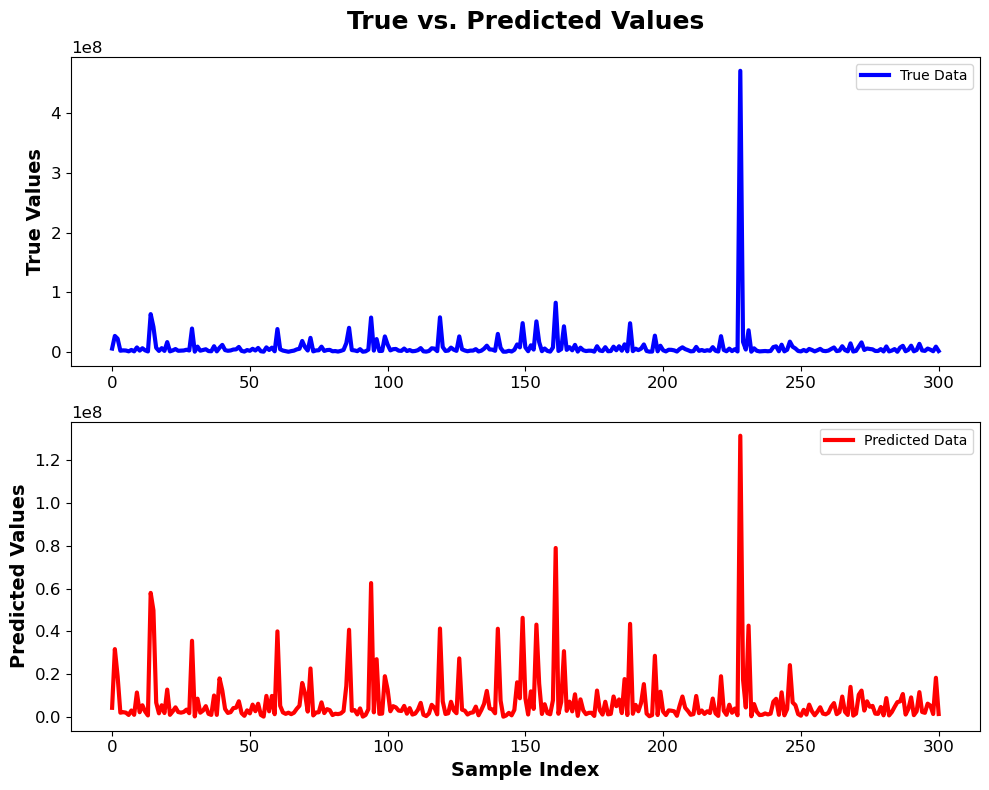

Model      RMSE       MAE    R²  \
0                         Linear Regression  2.43e+09  1.46e+08 -1.00   
1                          Ridge Regression  2.03e+07  5.35e+06  0.50   
2                          Lasso Regression  2.03e+07  5.12e+06  0.51   
3                     ElasticNet Regression  2.02e+07  5.33e+06  0.51   
4        Bagging Ensemble Linear Regression  1.42e+09  8.65e+07 -1.00   
5         Bagging Ensemble Ridge Regression  2.00e+07  4.83e+06  0.52   
6         Bagging Ensemble Lasso Regression  2.00e+07  4.62e+06  0.52   
7    Bagging Ensemble ElasticNet Regression  1.99e+07  4.82e+06  0.52   
8       Boosting Ensemble Linear Regression  1.54e+09  9.47e+07 -1.00   
9        Boosting Ensemble Ridge Regression  1.84e+07  5.45e+06  0.59   
10       Boosting Ensemble Lasso Regression  1.83e+07  5.16e+06  0.60   
11  Boosting Ensemble ElasticNet Regression  1.83e+07  5.32e+06  0.60   
12             Stacking Ensemble Regression  9.75e+07  3.22e+07 -1.00   
13                       XGBoost Regression  1.97e+07  2.10e+06  0.53   

    CV RMSE Mean  CV MAE Mean  CV R² Mean  
0       1.48e+08     1.43e+07        0.14  
1       1.83e+07     5.65e+06        0.20  
2       1.83e+07     5.56e+06        0.20  
3       1.83e+07     5.65e+06        0.20  
4       1.31e+08     1.27e+07        0.26  
5       1.72e+07     5.14e+06        0.27  
6       1.73e+07     5.01e+06        0.27  
7       1.72e+07     5.14e+06        0.27  
8       1.64e+09     1.14e+08       -0.01  
9       2.12e+07     7.85e+06        0.05  
10      2.11e+07     7.69e+06        0.07  
11      2.19e+07     8.51e+06       -0.05  
12      3.53e+08     2.90e+07        0.09  
13      1.11e+07     2.37e+06        0.71

In [38]:
# ==================================================================================================
# XGBoost REGRESSION MODEL (WITH PIPELINE) + CROSS VALIDATION
# ==================================================================================================
# Define preprocessing steps for the columns
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_imputer', KNNImputer(), knn_columns),  # Apply KNN imputation to specific columns
    ],
    remainder='passthrough'  # Pass through columns not specified above
)

# Combine preprocessing with the XGBoost model
pipeline_xgb = Pipeline(steps=[
    # # ('preprocessor', preprocessor),
    # ('log_transform', log_transform_func),
    # ('scaler', StandardScaler()),
    ('xgb_regressor', XGBRegressor())
])


param_grid = {
    'xgb_regressor__n_estimators': np.linspace(100, 500, 5, dtype=int),
    'xgb_regressor__learning_rate': np.linspace(0.01, 0.5, 5),
    'xgb_regressor__reg_alpha': [0.1, 1, 10],  # L1 regularization parameter
    'xgb_regressor__reg_lambda': [0.1, 1, 10],   # L2 regularization parameter

}

# Perform GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Hyperparameters:", best_params_xgb)

# Get the best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_

# Fit the best XGBoost model on the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = best_xgb_model.predict(X_test)

# ==================================================================================================
# EVALUATION METRICS (Baseline Error, MSE, MAE, R²)
# ==================================================================================================
# Add evaluation metrics to dataframe
evaluation_metrics_df = calculate_metrics(best_xgb_model, 'XGBoost Regression', y_test, y_pred_xgb, X_train, y_train, existing_df=evaluation_metrics_df)


# ==================================================================================================
# PLOT True (TEST) vs. Predicted Values 
# ==================================================================================================
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot true data in the first subplot
ax1.plot(range(len(y_test)), y_test, color='blue', label='True Data')
ax1.set_ylabel('True Values')
ax1.set_title('True vs. Predicted Values')
ax1.legend()

# Plot predicted data in the second subplot
ax2.plot(range(len(y_pred_xgb)), y_pred_xgb, color='red', label='Predicted Data')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Predicted Values')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


display(evaluation_metrics_df)

## II.2. Random Forests

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [40]:
# # ==================================================================================================
# # HYPERPARAMETERS TUNING
# # ==================================================================================================
# X_train, X_test, y_train, y_test = train_test_split(df_final_features, df_current_target, test_size=0.2, random_state=42)

# # Define the Random Forest regressor
# rf_regressor = RandomForestRegressor()

# # Define the hyperparameters to tune
# param_grid = {
#     'n_estimators': [50, 100, 150, 200, 250],
#     'max_depth': [None, 3, 5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 3, 5, 10],
#     'max_features': ['log2', 'sqrt']
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# best_grid = grid_search.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Hyperparameters: {'rf_regressor__max_depth': 20, 'rf_regressor__n_estimators': 100}


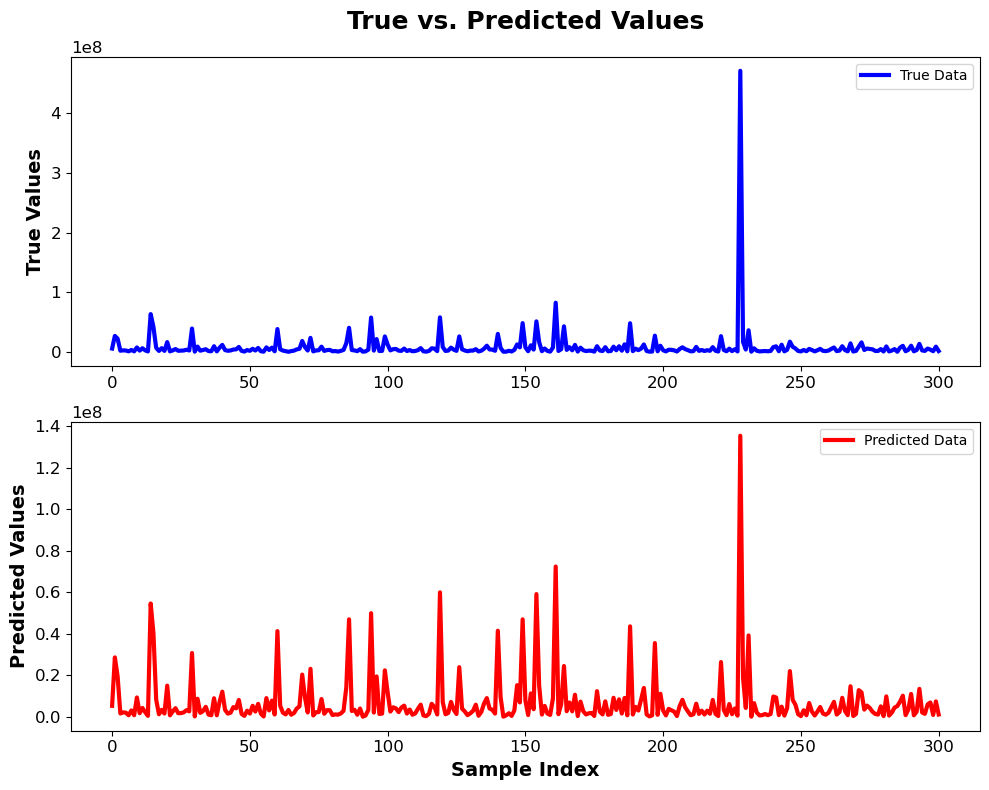

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ==================================================================================================
# Random Forest REGRESSION MODEL (WITH PIPELINE) + CROSS VALIDATION
# ==================================================================================================
# Define preprocessing steps for the columns
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_imputer', KNNImputer(), knn_columns),  # Apply KNN imputation to specific columns
    ],
    remainder='passthrough'  # Pass through columns not specified above
)

# Combine preprocessing with the Random Forest model
pipeline_rf = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    # ('log_transform', log_transform_func),
    # ('scaler', StandardScaler()),
    ('rf_regressor', RandomForestRegressor())
])

# Define the hyperparameters to tune
param_grid = {
    'rf_regressor__n_estimators': np.linspace(100, 500, 5, dtype=int),
    'rf_regressor__max_depth': np.linspace(1, 20, 5, dtype=int),
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:", best_params_rf)

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Fit the best Random Forest model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = best_rf_model.predict(X_test)
# ==================================================================================================
# EVALUATION METRICS (Baseline Error, MSE, MAE, R²)
# ==================================================================================================
# Add evaluation metrics to dataframe
evaluation_metrics_df = calculate_metrics(best_rf_model, 'Random Forest Regression', y_test, y_pred_rf, X_train, y_train, existing_df=evaluation_metrics_df)


# ==================================================================================================
# PLOT True (TEST) vs. Predicted Values 
# ==================================================================================================
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot true data in the first subplot
ax1.plot(range(len(y_test)), y_test, color='blue', label='True Data')
ax1.set_ylabel('True Values')
ax1.set_title('True vs. Predicted Values')
ax1.legend()

# Plot predicted data in the second subplot
ax2.plot(range(len(y_pred_rf)), y_pred_rf, color='red', label='Predicted Data')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Predicted Values')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [42]:
# from sklearn import tree
# # Get the first decision tree from the forest
# first_tree = best_rf_model.estimators_[0]

# # Plot the first tree
# plt.figure(figsize=(30, 20))
# tree.plot_tree(first_tree, feature_names=df_final_features.columns, filled=True, max_depth=6)  # Adjust max_depth as needed
# plt.show()


## II.3. SVM

In [43]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [44]:
# # ==================================================================================================
# # HYPERPARAMETERS TUNING
# # ==================================================================================================
# # Define the SVM regressor
# svm_regressor = SVR()

# # Define the hyperparameters to tune
# param_grid = {
#     'kernel': ['linear', 'poly', 'rbf'],
#     'C': [0.1, 1, 10],
#     'gamma': ['scale', 'auto']
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)



In [45]:
# # ==================================================================================================
# # SVM REGRESSION MODEL (WITH PIPELINE) + CROSS VALIDATION
# # ==================================================================================================
# # Define preprocessing steps for the columns
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('knn_imputer', KNNImputer(), knn_columns),  # Apply KNN imputation to specific columns
#     ],
#     remainder='passthrough'  # Pass through columns not specified above
# )

# # Combine preprocessing with the SVM model
# pipeline_svm = Pipeline(steps=[
#     # ('preprocessor', preprocessor),
#     # ('log_transform', log_transform_func),
#     # ('scaler', StandardScaler()),
#     ('svm_regressor', SVR())
# ])

# # Define the hyperparameters to tune
# param_grid = {
#     'svm_regressor__C': np.linspace(1, 10, 10, dtype=int),
#     'svm_regressor__kernel': ['linear', 'rbf'],  # Kernel choices
#     'svm_regressor__gamma': ['scale', 'auto'],  # Gamma options
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search_svm = GridSearchCV(estimator=pipeline_svm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
# grid_search_svm.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params_svm = grid_search_svm.best_params_
# print("Best Hyperparameters:", best_params_svm)

# # Get the best SVM model
# best_svm_model = grid_search_svm.best_estimator_

# # Fit the best SVM model on the training data
# best_svm_model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred_svm = best_svm_model.predict(X_test)

# # ==================================================================================================
# # EVALUATION METRICS (Baseline Error, MSE, MAE, R²)
# # ==================================================================================================
# # Add evaluation metrics to dataframe
# evaluation_metrics_df = calculate_metrics(best_svm_model, 'SVM Regression', y_test, y_pred_svm, X_train, y_train, existing_df=evaluation_metrics_df)


# # ==================================================================================================
# # PLOT True (TEST) vs. Predicted Values 
# # ==================================================================================================
# # Create a figure with two subplots
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# # Plot true data in the first subplot
# ax1.plot(range(len(y_test)), y_test, color='blue', label='True Data')
# ax1.set_ylabel('True Values')
# ax1.set_title('True vs. Predicted Values')
# ax1.legend()

# # Plot predicted data in the second subplot
# ax2.plot(range(len(y_pred_svm)), y_pred_svm, color='red', label='Predicted Data')
# ax2.set_xlabel('Sample Index')
# ax2.set_ylabel('Predicted Values')
# ax2.legend()

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show the plot
# plt.show()

# III. RANKING OF MODELS BASED ON 1. CV MSE Mean, 2. CV MAE Mean and 3. CV R² Mean

In [46]:
#### Define a function to calculate ranks
def calculate_ranks(metric_values):
    # Sort the values in ascending order for CV MSE Mean and CV MAE Mean
    if 'RMSE' in metric_values.name or 'MAE' in metric_values.name:
        return metric_values.rank(method='min')
    # Sort the values in descending order for CV R² Mean
    elif 'R²' in metric_values.name:
        return metric_values.rank(method='min', ascending=False)


# # ==================================================================================================
# # RANK MODELS BASED ON THEIR CV EVALUATION METRICS
# # ==================================================================================================
# Select the columns containing the error metrics
error_metric_columns = ['CV RMSE Mean', 'CV MAE Mean', 'CV R² Mean']

# Calculate ranks for each error metric
for column in error_metric_columns:
    evaluation_metrics_df[f'RANK {column}'] = calculate_ranks(evaluation_metrics_df[column])


# # ==================================================================================================
# # Get the Global Rank
# # ==================================================================================================
# Drop rows with NaN values
evaluation_metrics_df = evaluation_metrics_df.dropna()

# Calculate ranks for each error metric
for column in error_metric_columns:
    evaluation_metrics_df[f'RANK {column}'] = calculate_ranks(evaluation_metrics_df[column])

# Add a new column to store the mean of the ranks
evaluation_metrics_df['Global Rank'] = evaluation_metrics_df[[f'RANK {column}' for column in error_metric_columns]].mean(axis=1)

# Sort the DataFrame by the global rank
evaluation_metrics_df = evaluation_metrics_df.sort_values(by='Global Rank')

# Reset the index after sorting
evaluation_metrics_df = evaluation_metrics_df.reset_index(drop=True)

# Display the DataFrame with the global ranks
display(evaluation_metrics_df)



Model      RMSE       MAE    R²  \
0                  Random Forest Regression  1.95e+07  1.99e+06  0.54   
1                        XGBoost Regression  1.97e+07  2.10e+06  0.53   
2         Bagging Ensemble Lasso Regression  2.00e+07  4.62e+06  0.52   
3    Bagging Ensemble ElasticNet Regression  1.99e+07  4.82e+06  0.52   
4         Bagging Ensemble Ridge Regression  2.00e+07  4.83e+06  0.52   
5                          Lasso Regression  2.03e+07  5.12e+06  0.51   
6                          Ridge Regression  2.03e+07  5.35e+06  0.50   
7                     ElasticNet Regression  2.02e+07  5.33e+06  0.51   
8        Bagging Ensemble Linear Regression  1.42e+09  8.65e+07 -1.00   
9        Boosting Ensemble Lasso Regression  1.83e+07  5.16e+06  0.60   
10       Boosting Ensemble Ridge Regression  1.84e+07  5.45e+06  0.59   
11                        Linear Regression  2.43e+09  1.46e+08 -1.00   
12  Boosting Ensemble ElasticNet Regression  1.83e+07  5.32e+06  0.60   
13             Stacking Ensemble Regression  9.75e+07  3.22e+07 -1.00   
14      Boosting Ensemble Linear Regression  1.54e+09  9.47e+07 -1.00   

    CV RMSE Mean  CV MAE Mean  CV R² Mean  RANK CV RMSE Mean  \
0       1.00e+07     2.22e+06        0.77                1.0   
1       1.11e+07     2.37e+06        0.71                2.0   
2       1.73e+07     5.01e+06        0.27                5.0   
3       1.72e+07     5.14e+06        0.27                3.0   
4       1.72e+07     5.14e+06        0.27                4.0   
5       1.83e+07     5.56e+06        0.20                6.0   
6       1.83e+07     5.65e+06        0.20                7.0   
7       1.83e+07     5.65e+06        0.20                8.0   
8       1.31e+08     1.27e+07        0.26               12.0   
9       2.11e+07     7.69e+06        0.07                9.0   
10      2.12e+07     7.85e+06        0.05               10.0   
11      1.48e+08     1.43e+07        0.14               13.0   
12      2.19e+07     8.51e+06       -0.05               11.0   
13      3.53e+08     2.90e+07        0.09               14.0   
14      1.64e+09     1.14e+08       -0.01               15.0   

    RANK CV MAE Mean  RANK CV R² Mean  Global Rank  
0                1.0              1.0         1.00  
1                2.0              2.0         2.00  
2                3.0              3.0         3.67  
3                4.0              5.0         4.00  
4                5.0              4.0         4.33  
5                6.0              9.0         7.00  
6                8.0              7.0         7.33  
7                7.0              8.0         7.67  
8               12.0              6.0        10.00  
9                9.0             12.0        10.00  
10              10.0             13.0        11.00  
11              13.0             10.0        12.00  
12              11.0             15.0        12.33  
13              14.0             11.0        13.00  
14              15.0             14.0        14.67

In [47]:
evaluation_metrics_df[['Model', 'CV RMSE Mean', 'CV MAE Mean', 'CV R² Mean', 'Global Rank']]

Model  CV RMSE Mean  CV MAE Mean  \
0                  Random Forest Regression      1.00e+07     2.22e+06   
1                        XGBoost Regression      1.11e+07     2.37e+06   
2         Bagging Ensemble Lasso Regression      1.73e+07     5.01e+06   
3    Bagging Ensemble ElasticNet Regression      1.72e+07     5.14e+06   
4         Bagging Ensemble Ridge Regression      1.72e+07     5.14e+06   
5                          Lasso Regression      1.83e+07     5.56e+06   
6                          Ridge Regression      1.83e+07     5.65e+06   
7                     ElasticNet Regression      1.83e+07     5.65e+06   
8        Bagging Ensemble Linear Regression      1.31e+08     1.27e+07   
9        Boosting Ensemble Lasso Regression      2.11e+07     7.69e+06   
10       Boosting Ensemble Ridge Regression      2.12e+07     7.85e+06   
11                        Linear Regression      1.48e+08     1.43e+07   
12  Boosting Ensemble ElasticNet Regression      2.19e+07     8.51e+06   
13             Stacking Ensemble Regression      3.53e+08     2.90e+07   
14      Boosting Ensemble Linear Regression      1.64e+09     1.14e+08   

    CV R² Mean  Global Rank  
0         0.77         1.00  
1         0.71         2.00  
2         0.27         3.67  
3         0.27         4.00  
4         0.27         4.33  
5         0.20         7.00  
6         0.20         7.33  
7         0.20         7.67  
8         0.26        10.00  
9         0.07        10.00  
10        0.05        11.00  
11        0.14        12.00  
12       -0.05        12.33  
13        0.09        13.00  
14       -0.01        14.67

In [48]:
evaluation_metrics_df[['Model', 'RANK CV RMSE Mean', 'RANK CV MAE Mean', 'RANK CV R² Mean']]

Model  RANK CV RMSE Mean  \
0                  Random Forest Regression                1.0   
1                        XGBoost Regression                2.0   
2         Bagging Ensemble Lasso Regression                5.0   
3    Bagging Ensemble ElasticNet Regression                3.0   
4         Bagging Ensemble Ridge Regression                4.0   
5                          Lasso Regression                6.0   
6                          Ridge Regression                7.0   
7                     ElasticNet Regression                8.0   
8        Bagging Ensemble Linear Regression               12.0   
9        Boosting Ensemble Lasso Regression                9.0   
10       Boosting Ensemble Ridge Regression               10.0   
11                        Linear Regression               13.0   
12  Boosting Ensemble ElasticNet Regression               11.0   
13             Stacking Ensemble Regression               14.0   
14      Boosting Ensemble Linear Regression               15.0   

    RANK CV MAE Mean  RANK CV R² Mean  
0                1.0              1.0  
1                2.0              2.0  
2                3.0              3.0  
3                4.0              5.0  
4                5.0              4.0  
5                6.0              9.0  
6                8.0              7.0  
7                7.0              8.0  
8               12.0              6.0  
9                9.0             12.0  
10              10.0             13.0  
11              13.0             10.0  
12              11.0             15.0  
13              14.0             11.0  
14              15.0             14.0

In [49]:
# ==================================================================================================
# SAVE DATA INTO EXCEL (evaluation_metrics_df.xlsx)
# ==================================================================================================

# Specify the file path where you want to save the Excel file
excel_file_path = r'C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET4_Anticipez_les_besoins_en_consommation_de_batiments\DATA\evaluation_metrics_df.xlsx'

# Write the DataFrame to Excel
evaluation_metrics_df.to_excel(excel_file_path, index=False)

# Print a message indicating the successful save
print(f"Filtered data has been successfully saved to: {excel_file_path}")

Filtered data has been successfully saved to: C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET4_Anticipez_les_besoins_en_consommation_de_batiments\DATA\evaluation_metrics_df.xlsx


# IV. Choice of the Model

In [50]:
# # ==================================================================================================
# # Select the best pipeline dynamically (global rank 1)
# # ==================================================================================================
# Assuming you have a dictionary named pipelines where keys are model names and values are pipelines
pipelines = {
    'Linear Regression': pipeline_linear_regression,
    'Ridge Regression': best_ridge_regressor,
    'Lasso Regression': best_lasso_regressor,
    'ElasticNet Regression': best_elasticnet_regressor,
    
    'Bagging Ensemble Linear Regression': bagging_linear_pipeline,
    'Bagging Ensemble Ridge Regression': bagging_ridge_pipeline,
    'Bagging Ensemble Lasso Regression': bagging_lasso_pipeline,
    'Bagging Ensemble ElasticNet Regression': bagging_elastic_net_pipeline,

    'Boosting Ensemble Linear Regression': boosting_linear_pipeline,
    'Boosting Ensemble Ridge Regression': boosting_ridge_pipeline,
    'Boosting Ensemble Lasso Regression': boosting_lasso_pipeline,
    'Boosting Ensemble ElasticNet Regression': boosting_elastic_net_pipeline,
    
    'Stacking Ensemble Regression': stacking_pipeline,

    'XGBoost Regression': best_xgb_model,
    'Random Forest Regression': best_rf_model,
}

# Filter the DataFrame to get the row with the lowest global rank
selected_model_row = evaluation_metrics_df[evaluation_metrics_df['Global Rank'] == evaluation_metrics_df['Global Rank'].min()]

# Extract the selected model name
selected_model_name = selected_model_row['Model'].values[0]

# Retrieve the corresponding pipeline from the dictionary
selected_pipeline = pipelines[selected_model_name]

# Print the selected model and its corresponding pipeline
print("Selected Model:", selected_model_name)
print("Selected Pipeline:", selected_pipeline)


Selected Model: Random Forest Regression
Selected Pipeline: Pipeline(steps=[('rf_regressor', RandomForestRegressor(max_depth=20))])


# V. FEATURES IMPORTANCES

## V.1. Feature Coefficients

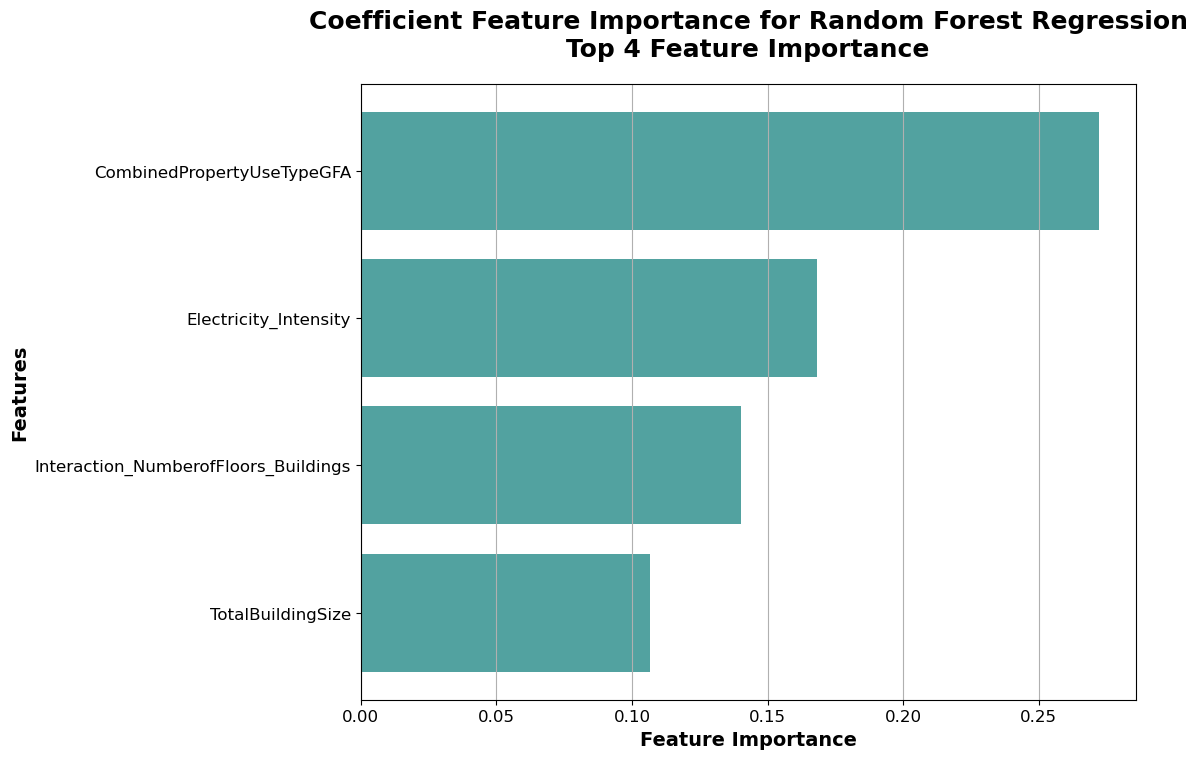

In [51]:
# ==================================================================================================
# FEATURES IMPORTANCES - METHOD 1 - Coefs
# ==================================================================================================
# Get the final estimator from the selected pipeline
final_estimator = selected_pipeline.steps[-1][1]

# Check if the final estimator has the attribute 'coef_' (for linear models)
if hasattr(final_estimator, 'coef_'):
    # For linear models, directly get the coefficients
    feature_coeffs = final_estimator.coef_
else:
    # For other models (e.g., tree-based models), get feature importances
    feature_importances = final_estimator.feature_importances_

    # Optionally, you can normalize feature importances to make them comparable
    feature_importances /= np.sum(feature_importances)

# Get the indices of the top 5 features based on absolute coefficient/importance values
top5_indices = np.argsort(np.abs(feature_coeffs if hasattr(final_estimator, 'coef_') else feature_importances))[-4:]

# Get the top 5 feature coefficients/importances and names
top5_values = feature_coeffs[top5_indices] if hasattr(final_estimator, 'coef_') else feature_importances[top5_indices]
top5_features = df_final_features.columns[top5_indices]

# Plot feature importance as horizontal bar plot for the top 5 features
plt.figure(figsize=(10, 8))
plt.barh(range(len(top5_values)), np.abs(top5_values), color = blue_green)
plt.yticks(range(len(top5_values)), top5_features)
plt.xlabel('Absolute Coefficient Value' if hasattr(final_estimator, 'coef_') else 'Feature Importance')
plt.ylabel('Features')
plt.title(f'Coefficient Feature Importance for {selected_model_name}\nTop 4 Feature Importance')
plt.grid(axis='x')  # Add gridlines for better readability
plt.show()


## V.2. Permutation importances

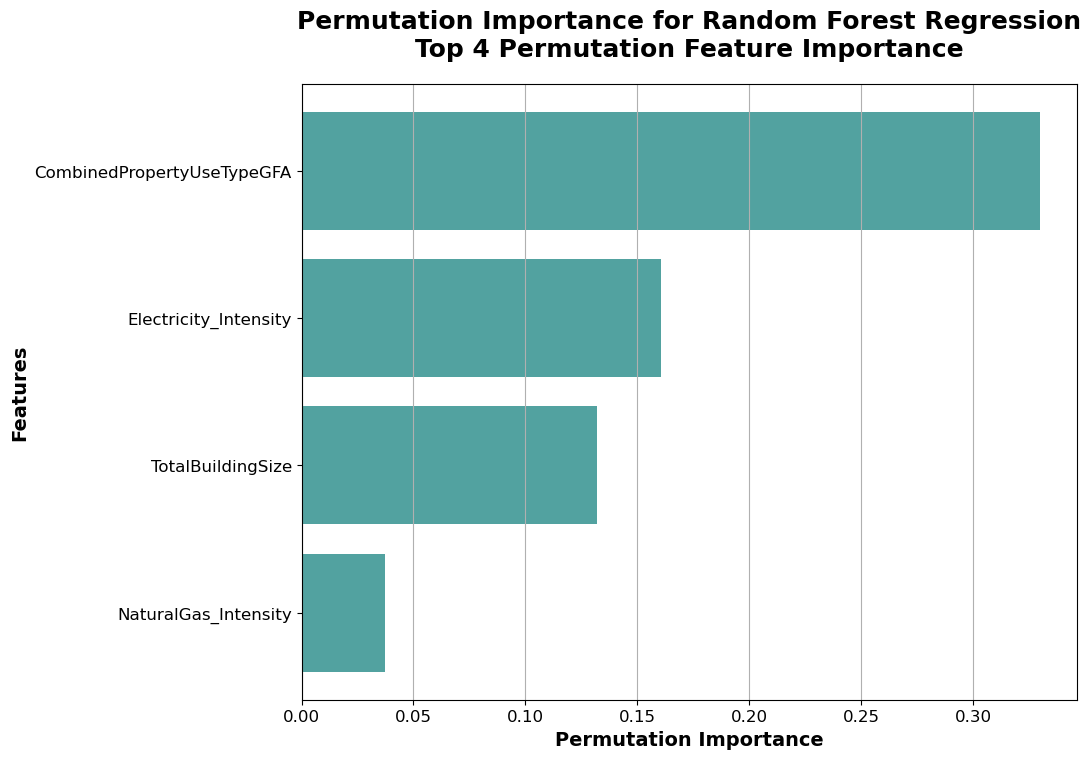

In [52]:
# ==================================================================================================
# FEATURES IMPORTANCES - METHOD 2 - Permutation importances
# ==================================================================================================
'''
The perm_importance object returned by the permutation_importance function contains three arrays:

1. importances_mean: This array contains the mean importance of each feature across all repetitions of permutations. 
    It provides an overall measure of the importance of each feature.
2. importances_std: This array contains the standard deviation of the importance of each feature across all repetitions of permutations. 
    It gives an indication of the variability in the importance estimates.
3. importances: This array contains the importance values for each feature for each repetition of permutations. Each row corresponds 
    to a different repetition, and each column corresponds to a different feature.
'''
from sklearn.inspection import permutation_importance

# Calculate permutation importances
perm_importance = permutation_importance(selected_pipeline, X_test, y_test, n_repeats=30, random_state=42)

# Get the indices of the top 5 features based on permutation importances
top5_indices_perm = np.argsort(perm_importance.importances_mean)[-4:]

# Get the top 5 permutation importances and feature names
top5_perm_importances = perm_importance.importances_mean[top5_indices_perm]
top5_perm_features = df_final_features.columns[top5_indices_perm]

# Plot permutation importances for the top 5 features
plt.figure(figsize=(10, 8))
plt.barh(range(len(top5_perm_importances)), top5_perm_importances, color = blue_green)
plt.yticks(range(len(top5_perm_importances)), top5_perm_features)
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title(f'Permutation Importance for {selected_model_name}\nTop 4 Permutation Feature Importance')
plt.grid(axis='x')  # Add gridlines for better readability
plt.show()

## V.3. SHAP - SHapley Additive exPlanations

Feature  SHAP_importance
26                 LargestPropertyUseType_Data Center         8.22e+06
27  LargestPropertyUseType_Hospital (General Medic...         7.04e+06
22               Interaction_NumberofFloors_Buildings         6.97e+06
25                       PrimaryPropertyType_Hospital         4.45e+06
7                                   TotalBuildingSize         2.99e+06

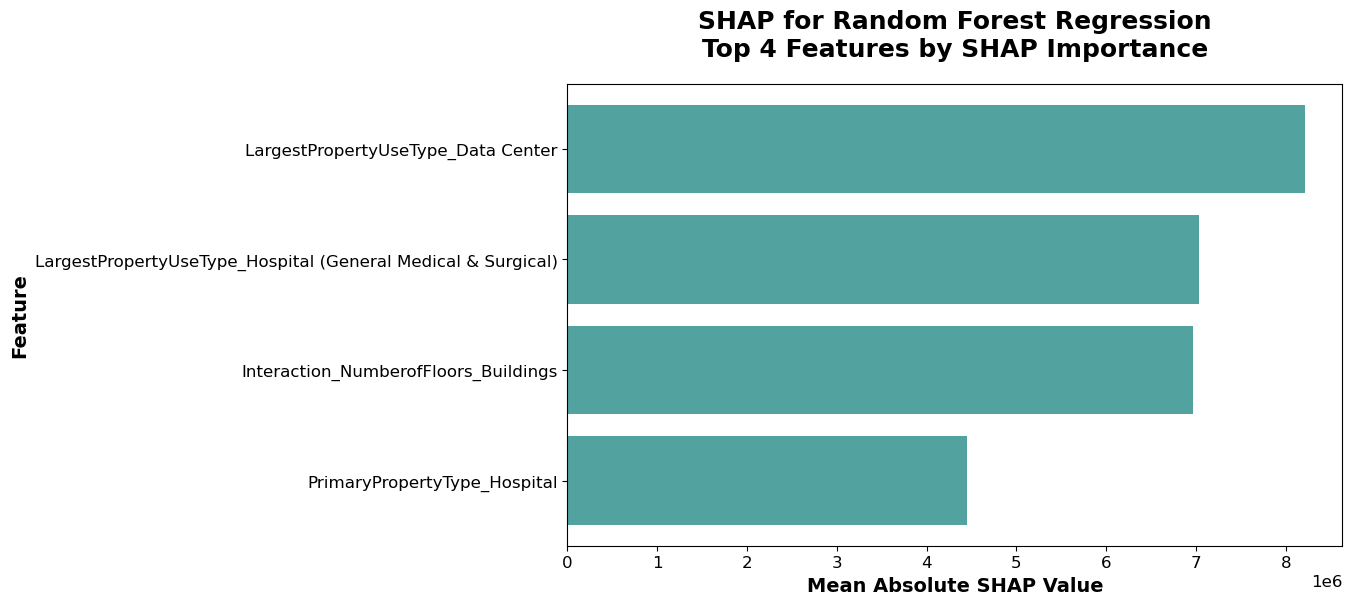

In [53]:
import shap
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# ==================================================================================================
# FEATURES IMPORTANCES - METHOD 3 - SHAP
# ==================================================================================================

# Define preprocessing steps for numeric and categorical features
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = SimpleImputer(strategy='mean')  # You can customize the imputation strategy here

categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # You can customize the imputation strategy here
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing pipeline to training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get the final estimator from the selected pipeline
final_estimator = selected_pipeline.steps[-1][1]

# Initialize a SHAP explainer with the final estimator and training data
explainer = shap.Explainer(final_estimator, X_train_processed, check_additivity=False)

# Calculate SHAP values
shap_values = explainer(X_test, check_additivity=False)

# Define the feature names
feature_names = X_train.columns

# Create a DataFrame for SHAP values
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)

# Calculate the mean absolute SHAP values for each feature
mean_shap_values = np.abs(shap_df.values).mean(0)

# Create a DataFrame to store feature importances
shap_importance = pd.DataFrame(list(zip(feature_names, mean_shap_values)),
                               columns=['Feature', 'SHAP_importance'])

# Sort the DataFrame by SHAP importance in descending order
shap_importance.sort_values(by='SHAP_importance', ascending=False, inplace=True)

# Display the top features by SHAP importance
display(shap_importance.head())

# ==================================================================================================
# FEATURES IMPORTANCES - METHOD 3 - PLOT SHAPE
# ==================================================================================================
# Plot the SHAP values for the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(shap_importance['Feature'][:4], shap_importance['SHAP_importance'][:4], color = blue_green)
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title(f'SHAP for {selected_model_name}\nTop 4 Features by SHAP Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display features from top to bottom
plt.show()


## V.4. LOCAL SHAP

In [54]:
# load JS visualization code to notebook
shap.initjs()

In [55]:
# ==================================================================================================
# FEATURES IMPORTANCES - LOCAL SHAP - FORCE PLOT
# ==================================================================================================
# Define the instance index for which you want to visualize local SHAP values
instance_index = 15  # Adjust this index as needed

# Create an Explanation object for the selected instance
expl = shap.Explanation(values=shap_values[instance_index], base_values=explainer.expected_value, data=X_test.iloc[instance_index], feature_names=feature_names)

# Plot SHAP values for the selected instance
shap.force_plot(explainer.expected_value, expl.values, expl.data, feature_names=feature_names)

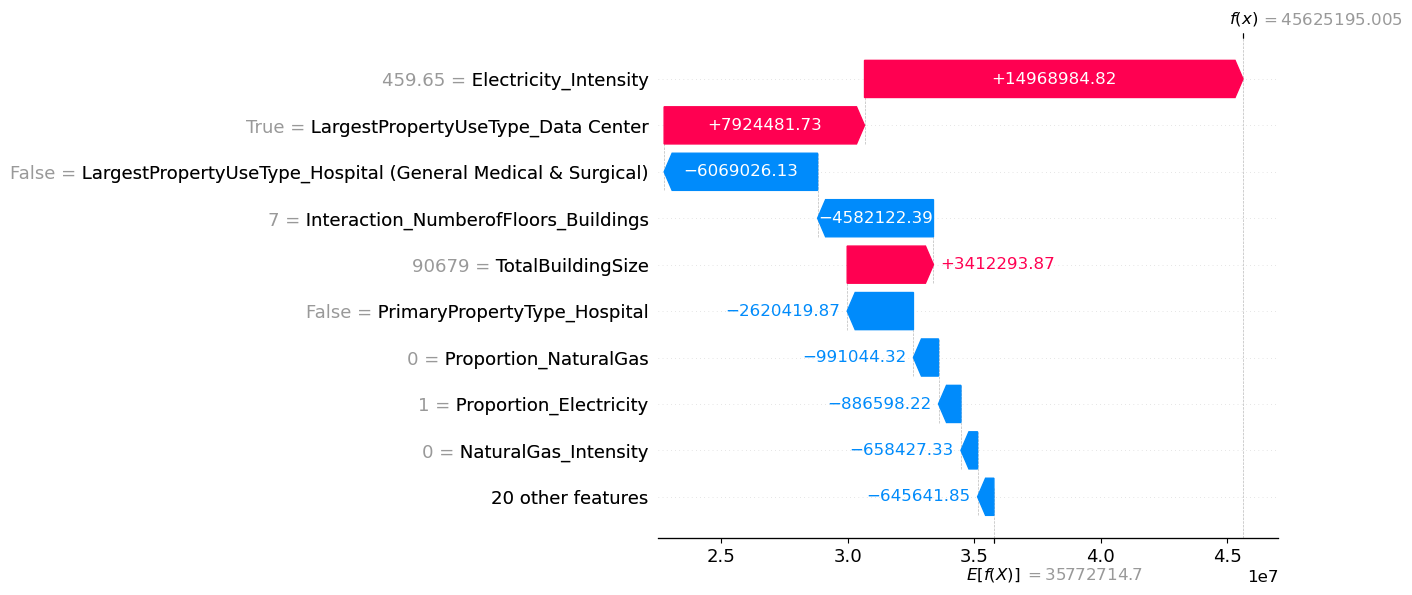

In [56]:
# ==================================================================================================
# FEATURES IMPORTANCES - LOCAL SHAP - WATERFALL PLOT
# ==================================================================================================
shap.plots.waterfall(shap_values[instance_index])


In [57]:
# ==================================================================================================
# FEATURES IMPORTANCES - LOCAL SHAP - Visualize the training set predictions
# ==================================================================================================
shap.plots.force(shap_values)

## V.5. FEATURE ELIMINATION 

In [58]:
# ==================================================================================================
# FEATURES SELECTION - RFE - Recursive Feature Elimination
# ==================================================================================================
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

# Define the range of values for n_features_to_select
n_features_range = range(1, len(X_train.columns) + 1)

# Get the final estimator from the selected pipeline
final_estimator = selected_pipeline.steps[-1][1]

# Initialize lists to store mean cross-validation scores
mean_scores = []

# Loop through different values of n_features_to_select
for n_features in n_features_range:
    print(f"Testing number of features: {n_features}")
    
    # Initialize RFE with the final estimator
    rfe = RFE(estimator=final_estimator, n_features_to_select=n_features, step=3)
    
    # Perform cross-validation
    cv_scores = cross_val_score(rfe, X_train, y_train, cv=5)
    
    # Calculate mean cross-validation score
    mean_score = cv_scores.mean()
    mean_scores.append(mean_score)
    
    print(f"Mean cross-validation score for {n_features} features: {mean_score}")
    

# Find the optimal value of n_features_to_select
optimal_n_features = n_features_range[np.argmax(mean_scores)]
print("Optimal number of features:", optimal_n_features)

# Train RFE with the optimal number of features
rfe = RFE(estimator=final_estimator, n_features_to_select=optimal_n_features, step=1)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]

# Train the selected pipeline on selected features
selected_pipeline.fit(X_train[selected_features], y_train)

print("Selected features:")
print(selected_features)


Testing number of features: 1
Mean cross-validation score for 1 features: 0.17882114390258028
Testing number of features: 2
Mean cross-validation score for 2 features: 0.6548182646929831
Testing number of features: 3
Mean cross-validation score for 3 features: 0.6287607664831782
Testing number of features: 4
Mean cross-validation score for 4 features: 0.7079007880849033
Testing number of features: 5
Mean cross-validation score for 5 features: 0.7735624517446442
Testing number of features: 6
Mean cross-validation score for 6 features: 0.7746421092395366
Testing number of features: 7
Mean cross-validation score for 7 features: 0.7797212530664348
Testing number of features: 8
Mean cross-validation score for 8 features: 0.8039070064859477
Testing number of features: 9
Mean cross-validation score for 9 features: 0.7863698252979809
Testing number of features: 10
Mean cross-validation score for 10 features: 0.7869310670900185
Testing number of features: 11
Mean cross-validation score for 11 f

## V.6. SIMPLIFIED MODEL

In [59]:
# Get the final estimator from the selected pipeline
final_estimator = selected_pipeline.steps[-1][1]

# Check the type of the final estimator
final_estimator_type = type(final_estimator).__name__
print("Final Estimator Type:", final_estimator_type)


Final Estimator Type: RandomForestRegressor


In [60]:
evaluation_metrics_df

Model      RMSE       MAE    R²  \
0                  Random Forest Regression  1.95e+07  1.99e+06  0.54   
1                        XGBoost Regression  1.97e+07  2.10e+06  0.53   
2         Bagging Ensemble Lasso Regression  2.00e+07  4.62e+06  0.52   
3    Bagging Ensemble ElasticNet Regression  1.99e+07  4.82e+06  0.52   
4         Bagging Ensemble Ridge Regression  2.00e+07  4.83e+06  0.52   
5                          Lasso Regression  2.03e+07  5.12e+06  0.51   
6                          Ridge Regression  2.03e+07  5.35e+06  0.50   
7                     ElasticNet Regression  2.02e+07  5.33e+06  0.51   
8        Bagging Ensemble Linear Regression  1.42e+09  8.65e+07 -1.00   
9        Boosting Ensemble Lasso Regression  1.83e+07  5.16e+06  0.60   
10       Boosting Ensemble Ridge Regression  1.84e+07  5.45e+06  0.59   
11                        Linear Regression  2.43e+09  1.46e+08 -1.00   
12  Boosting Ensemble ElasticNet Regression  1.83e+07  5.32e+06  0.60   
13             Stacking Ensemble Regression  9.75e+07  3.22e+07 -1.00   
14      Boosting Ensemble Linear Regression  1.54e+09  9.47e+07 -1.00   

    CV RMSE Mean  CV MAE Mean  CV R² Mean  RANK CV RMSE Mean  \
0       1.00e+07     2.22e+06        0.77                1.0   
1       1.11e+07     2.37e+06        0.71                2.0   
2       1.73e+07     5.01e+06        0.27                5.0   
3       1.72e+07     5.14e+06        0.27                3.0   
4       1.72e+07     5.14e+06        0.27                4.0   
5       1.83e+07     5.56e+06        0.20                6.0   
6       1.83e+07     5.65e+06        0.20                7.0   
7       1.83e+07     5.65e+06        0.20                8.0   
8       1.31e+08     1.27e+07        0.26               12.0   
9       2.11e+07     7.69e+06        0.07                9.0   
10      2.12e+07     7.85e+06        0.05               10.0   
11      1.48e+08     1.43e+07        0.14               13.0   
12      2.19e+07     8.51e+06       -0.05               11.0   
13      3.53e+08     2.90e+07        0.09               14.0   
14      1.64e+09     1.14e+08       -0.01               15.0   

    RANK CV MAE Mean  RANK CV R² Mean  Global Rank  
0                1.0              1.0         1.00  
1                2.0              2.0         2.00  
2                3.0              3.0         3.67  
3                4.0              5.0         4.00  
4                5.0              4.0         4.33  
5                6.0              9.0         7.00  
6                8.0              7.0         7.33  
7                7.0              8.0         7.67  
8               12.0              6.0        10.00  
9                9.0             12.0        10.00  
10              10.0             13.0        11.00  
11              13.0             10.0        12.00  
12              11.0             15.0        12.33  
13              14.0             11.0        13.00  
14              15.0             14.0        14.67

In [61]:
# ==================================================================================================
# Performance of the simplified Model (based on the selected pipeline AND selected features)
# ==================================================================================================
# Get the final estimator from the selected pipeline
final_estimator = selected_pipeline.steps[-1][1]

# Check the type of the final estimator
final_estimator_type = type(final_estimator).__name__
print("Final Estimator Type:", final_estimator_type)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Split the data using only the selected features
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(df_final_features[selected_features], df_current_target, test_size=0.2, random_state=42)

# Print column names used during training and testing
print("Columns used during training:")
print(X_train_selected.columns.tolist())
print("\nColumns used during testing:")
print(X_test_selected.columns.tolist())

# Print shapes of training and testing datasets
print("\nShape of training data:", X_train_selected.shape)
print("Shape of testing data:", X_test_selected.shape)

# Combine preprocessing with the selected model from the pipeline
preprocessing_step = selected_pipeline.named_steps.get('preprocessing')
if preprocessing_step is not None:
    pipeline_simplified = Pipeline(steps=[
        ('preprocessing', preprocessing_step),  
        ('model', final_estimator)  
    ])
else:
    pipeline_simplified = Pipeline(steps=[
        ('model', final_estimator)
    ])
# Fit the simplified model on the training data with selected features
pipeline_simplified.fit(X_train_selected, y_train_selected)

# Make predictions on the test data with selected features
y_pred_simplified = pipeline_simplified.predict(X_test_selected)

# Calculate evaluation metrics for the simplified model
final_estimator_name = selected_pipeline.steps[-1][0]
eval_metrics_simplified = [f'{final_estimator_name} (Simplified)', 
                           None, 
                           None, 
                           None, 
                           np.sqrt(mean_squared_error(y_test_selected, y_pred_simplified)), 
                           mean_absolute_error(y_test_selected, y_pred_simplified), 
                           r2_score(y_test_selected, y_pred_simplified),
                           None, 
                           None, 
                           None, 
                           None, 
                        ]

# Get the index for the new row
new_row_index = len(evaluation_metrics_df)
# Add the evaluation metrics to the DataFrame
evaluation_metrics_df.loc[new_row_index] = eval_metrics_simplified

# Display the updated DataFrame
display(evaluation_metrics_df)


Final Estimator Type: RandomForestRegressor
Columns used during training:
['Proportion_Electricity', 'TotalBuildingSize', 'Electricity_Intensity', 'NaturalGas_Intensity', 'CombinedPropertyUseTypeGFA', 'Interaction_NumberofFloors_Buildings', 'PrimaryPropertyType_Hospital', 'LargestPropertyUseType_Hospital (General Medical & Surgical)']

Columns used during testing:
['Proportion_Electricity', 'TotalBuildingSize', 'Electricity_Intensity', 'NaturalGas_Intensity', 'CombinedPropertyUseTypeGFA', 'Interaction_NumberofFloors_Buildings', 'PrimaryPropertyType_Hospital', 'LargestPropertyUseType_Hospital (General Medical & Surgical)']

Shape of training data: (1202, 8)
Shape of testing data: (301, 8)


The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Model      RMSE       MAE    R²  \
0                  Random Forest Regression  1.95e+07  1.99e+06  0.54   
1                        XGBoost Regression  1.97e+07  2.10e+06  0.53   
2         Bagging Ensemble Lasso Regression  2.00e+07  4.62e+06  0.52   
3    Bagging Ensemble ElasticNet Regression  1.99e+07  4.82e+06  0.52   
4         Bagging Ensemble Ridge Regression  2.00e+07  4.83e+06  0.52   
5                          Lasso Regression  2.03e+07  5.12e+06  0.51   
6                          Ridge Regression  2.03e+07  5.35e+06  0.50   
7                     ElasticNet Regression  2.02e+07  5.33e+06  0.51   
8        Bagging Ensemble Linear Regression  1.42e+09  8.65e+07 -1.00   
9        Boosting Ensemble Lasso Regression  1.83e+07  5.16e+06  0.60   
10       Boosting Ensemble Ridge Regression  1.84e+07  5.45e+06  0.59   
11                        Linear Regression  2.43e+09  1.46e+08 -1.00   
12  Boosting Ensemble ElasticNet Regression  1.83e+07  5.32e+06  0.60   
13             Stacking Ensemble Regression  9.75e+07  3.22e+07 -1.00   
14      Boosting Ensemble Linear Regression  1.54e+09  9.47e+07 -1.00   
15                rf_regressor (Simplified)       NaN       NaN   NaN   

    CV RMSE Mean  CV MAE Mean  CV R² Mean  RANK CV RMSE Mean  \
0       1.00e+07     2.22e+06        0.77                1.0   
1       1.11e+07     2.37e+06        0.71                2.0   
2       1.73e+07     5.01e+06        0.27                5.0   
3       1.72e+07     5.14e+06        0.27                3.0   
4       1.72e+07     5.14e+06        0.27                4.0   
5       1.83e+07     5.56e+06        0.20                6.0   
6       1.83e+07     5.65e+06        0.20                7.0   
7       1.83e+07     5.65e+06        0.20                8.0   
8       1.31e+08     1.27e+07        0.26               12.0   
9       2.11e+07     7.69e+06        0.07                9.0   
10      2.12e+07     7.85e+06        0.05               10.0   
11      1.48e+08     1.43e+07        0.14               13.0   
12      2.19e+07     8.51e+06       -0.05               11.0   
13      3.53e+08     2.90e+07        0.09               14.0   
14      1.64e+09     1.14e+08       -0.01               15.0   
15      1.83e+07     1.92e+06        0.60                NaN   

    RANK CV MAE Mean  RANK CV R² Mean  Global Rank  
0                1.0              1.0         1.00  
1                2.0              2.0         2.00  
2                3.0              3.0         3.67  
3                4.0              5.0         4.00  
4                5.0              4.0         4.33  
5                6.0              9.0         7.00  
6                8.0              7.0         7.33  
7                7.0              8.0         7.67  
8               12.0              6.0        10.00  
9                9.0             12.0        10.00  
10              10.0             13.0        11.00  
11              13.0             10.0        12.00  
12              11.0             15.0        12.33  
13              14.0             11.0        13.00  
14              15.0             14.0        14.67  
15               NaN              NaN          NaN

In [62]:
evaluation_metrics_df

Model      RMSE       MAE    R²  \
0                  Random Forest Regression  1.95e+07  1.99e+06  0.54   
1                        XGBoost Regression  1.97e+07  2.10e+06  0.53   
2         Bagging Ensemble Lasso Regression  2.00e+07  4.62e+06  0.52   
3    Bagging Ensemble ElasticNet Regression  1.99e+07  4.82e+06  0.52   
4         Bagging Ensemble Ridge Regression  2.00e+07  4.83e+06  0.52   
5                          Lasso Regression  2.03e+07  5.12e+06  0.51   
6                          Ridge Regression  2.03e+07  5.35e+06  0.50   
7                     ElasticNet Regression  2.02e+07  5.33e+06  0.51   
8        Bagging Ensemble Linear Regression  1.42e+09  8.65e+07 -1.00   
9        Boosting Ensemble Lasso Regression  1.83e+07  5.16e+06  0.60   
10       Boosting Ensemble Ridge Regression  1.84e+07  5.45e+06  0.59   
11                        Linear Regression  2.43e+09  1.46e+08 -1.00   
12  Boosting Ensemble ElasticNet Regression  1.83e+07  5.32e+06  0.60   
13             Stacking Ensemble Regression  9.75e+07  3.22e+07 -1.00   
14      Boosting Ensemble Linear Regression  1.54e+09  9.47e+07 -1.00   
15                rf_regressor (Simplified)       NaN       NaN   NaN   

    CV RMSE Mean  CV MAE Mean  CV R² Mean  RANK CV RMSE Mean  \
0       1.00e+07     2.22e+06        0.77                1.0   
1       1.11e+07     2.37e+06        0.71                2.0   
2       1.73e+07     5.01e+06        0.27                5.0   
3       1.72e+07     5.14e+06        0.27                3.0   
4       1.72e+07     5.14e+06        0.27                4.0   
5       1.83e+07     5.56e+06        0.20                6.0   
6       1.83e+07     5.65e+06        0.20                7.0   
7       1.83e+07     5.65e+06        0.20                8.0   
8       1.31e+08     1.27e+07        0.26               12.0   
9       2.11e+07     7.69e+06        0.07                9.0   
10      2.12e+07     7.85e+06        0.05               10.0   
11      1.48e+08     1.43e+07        0.14               13.0   
12      2.19e+07     8.51e+06       -0.05               11.0   
13      3.53e+08     2.90e+07        0.09               14.0   
14      1.64e+09     1.14e+08       -0.01               15.0   
15      1.83e+07     1.92e+06        0.60                NaN   

    RANK CV MAE Mean  RANK CV R² Mean  Global Rank  
0                1.0              1.0         1.00  
1                2.0              2.0         2.00  
2                3.0              3.0         3.67  
3                4.0              5.0         4.00  
4                5.0              4.0         4.33  
5                6.0              9.0         7.00  
6                8.0              7.0         7.33  
7                7.0              8.0         7.67  
8               12.0              6.0        10.00  
9                9.0             12.0        10.00  
10              10.0             13.0        11.00  
11              13.0             10.0        12.00  
12              11.0             15.0        12.33  
13              14.0             11.0        13.00  
14              15.0             14.0        14.67  
15               NaN              NaN          NaN

In [63]:
# ==================================================================================================
# RANK MODELS BASED ON THEIR CV EVALUATION METRICS
# (Including the simplified Model)
# ==================================================================================================

# Calculate ranks for each error metric
for column in error_metric_columns:
    evaluation_metrics_df[f'RANK {column}'] = calculate_ranks(evaluation_metrics_df[column])

# Add a new column to store the mean of the ranks
evaluation_metrics_df['Global Rank'] = evaluation_metrics_df[[f'RANK {column}' for column in error_metric_columns]].mean(axis=1)

# Sort the DataFrame by the global rank
evaluation_metrics_df = evaluation_metrics_df.sort_values(by='Global Rank')

# Reset the index after sorting
evaluation_metrics_df = evaluation_metrics_df.reset_index(drop=True)

# Display the DataFrame with the global ranks
display(evaluation_metrics_df)




Model      RMSE       MAE    R²  \
0                  Random Forest Regression  1.95e+07  1.99e+06  0.54   
1                        XGBoost Regression  1.97e+07  2.10e+06  0.53   
2                 rf_regressor (Simplified)       NaN       NaN   NaN   
3         Bagging Ensemble Lasso Regression  2.00e+07  4.62e+06  0.52   
4    Bagging Ensemble ElasticNet Regression  1.99e+07  4.82e+06  0.52   
5         Bagging Ensemble Ridge Regression  2.00e+07  4.83e+06  0.52   
6                          Lasso Regression  2.03e+07  5.12e+06  0.51   
7                          Ridge Regression  2.03e+07  5.35e+06  0.50   
8                     ElasticNet Regression  2.02e+07  5.33e+06  0.51   
9        Bagging Ensemble Linear Regression  1.42e+09  8.65e+07 -1.00   
10       Boosting Ensemble Lasso Regression  1.83e+07  5.16e+06  0.60   
11       Boosting Ensemble Ridge Regression  1.84e+07  5.45e+06  0.59   
12                        Linear Regression  2.43e+09  1.46e+08 -1.00   
13  Boosting Ensemble ElasticNet Regression  1.83e+07  5.32e+06  0.60   
14             Stacking Ensemble Regression  9.75e+07  3.22e+07 -1.00   
15      Boosting Ensemble Linear Regression  1.54e+09  9.47e+07 -1.00   

    CV RMSE Mean  CV MAE Mean  CV R² Mean  RANK CV RMSE Mean  \
0       1.00e+07     2.22e+06        0.77                1.0   
1       1.11e+07     2.37e+06        0.71                2.0   
2       1.83e+07     1.92e+06        0.60                6.0   
3       1.73e+07     5.01e+06        0.27                5.0   
4       1.72e+07     5.14e+06        0.27                3.0   
5       1.72e+07     5.14e+06        0.27                4.0   
6       1.83e+07     5.56e+06        0.20                7.0   
7       1.83e+07     5.65e+06        0.20                8.0   
8       1.83e+07     5.65e+06        0.20                9.0   
9       1.31e+08     1.27e+07        0.26               13.0   
10      2.11e+07     7.69e+06        0.07               10.0   
11      2.12e+07     7.85e+06        0.05               11.0   
12      1.48e+08     1.43e+07        0.14               14.0   
13      2.19e+07     8.51e+06       -0.05               12.0   
14      3.53e+08     2.90e+07        0.09               15.0   
15      1.64e+09     1.14e+08       -0.01               16.0   

    RANK CV MAE Mean  RANK CV R² Mean  Global Rank  
0                2.0              1.0         1.33  
1                3.0              2.0         2.33  
2                1.0              3.0         3.33  
3                4.0              4.0         4.33  
4                5.0              6.0         4.67  
5                6.0              5.0         5.00  
6                7.0             10.0         8.00  
7                9.0              8.0         8.33  
8                8.0              9.0         8.67  
9               13.0              7.0        11.00  
10              10.0             13.0        11.00  
11              11.0             14.0        12.00  
12              14.0             11.0        13.00  
13              12.0             16.0        13.33  
14              15.0             12.0        14.00  
15              16.0             15.0        15.67

In [64]:
evaluation_metrics_df.loc[:, ['Model', 'CV RMSE Mean', 'CV MAE Mean', 'CV R² Mean', 'Global Rank']]


Model  CV RMSE Mean  CV MAE Mean  \
0                  Random Forest Regression      1.00e+07     2.22e+06   
1                        XGBoost Regression      1.11e+07     2.37e+06   
2                 rf_regressor (Simplified)      1.83e+07     1.92e+06   
3         Bagging Ensemble Lasso Regression      1.73e+07     5.01e+06   
4    Bagging Ensemble ElasticNet Regression      1.72e+07     5.14e+06   
5         Bagging Ensemble Ridge Regression      1.72e+07     5.14e+06   
6                          Lasso Regression      1.83e+07     5.56e+06   
7                          Ridge Regression      1.83e+07     5.65e+06   
8                     ElasticNet Regression      1.83e+07     5.65e+06   
9        Bagging Ensemble Linear Regression      1.31e+08     1.27e+07   
10       Boosting Ensemble Lasso Regression      2.11e+07     7.69e+06   
11       Boosting Ensemble Ridge Regression      2.12e+07     7.85e+06   
12                        Linear Regression      1.48e+08     1.43e+07   
13  Boosting Ensemble ElasticNet Regression      2.19e+07     8.51e+06   
14             Stacking Ensemble Regression      3.53e+08     2.90e+07   
15      Boosting Ensemble Linear Regression      1.64e+09     1.14e+08   

    CV R² Mean  Global Rank  
0         0.77         1.33  
1         0.71         2.33  
2         0.60         3.33  
3         0.27         4.33  
4         0.27         4.67  
5         0.27         5.00  
6         0.20         8.00  
7         0.20         8.33  
8         0.20         8.67  
9         0.26        11.00  
10        0.07        11.00  
11        0.05        12.00  
12        0.14        13.00  
13       -0.05        13.33  
14        0.09        14.00  
15       -0.01        15.67